# Experimenting with Feedback Analysis using Sentiment Analysis and Collaborative Filtering

## Data

Ingredient database contains features such as type, colour and taste features

In [2]:
import pandas as pd
from utils.process_data import get_data

# Fetch data
ingredient_df = get_data()

# Adjust pandas display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Print the specific columns
print(ingredient_df[['Category7', 'Texture', 'Taste', 'Colour']])


Successfully read 27 lines from the file. Loaded 26 ingredients.
                                      Category7 Texture   Taste  Colour
0                                        Apples    Soft   Sweet     Red
1                                    Aubergines    Soft    Mild  Purple
2                              Bitter chocolate    Hard  Bitter   Brown
3                        Breakfast-type sausage    Firm  Savory   Brown
4                              Brussels sprouts    Firm  Earthy   Green
5                                     Buckwheat  Grainy  Earthy   Brown
6                            Chicken fresh meat    Firm  Savory   White
7                Chocolate coated confectionery    Hard   Sweet   Brown
8                                      Couscous  Grainy    Mild  Yellow
9              Cow milk semi skimmed (half fat)  Liquid    Mild   White
10                   Cow milk skimmed (low fat)  Liquid    Mild   White
11                               Cow milk whole  Liquid    Mild   White

### Child Feature Data

Generated data on 30 children, including features such as age, gender, favorite_cuisine, and health considerations. These features are known to influence food preferences. Such data could be collected through existing databases. These features paired with the ingredient features could be used to predict whether a new child will like an ingredient.

In [3]:
def get_child_data():
    # Function to get feature data on children
    return {
        "child1": {"age": 10, "gender": "M", "health_consideration": "indifferent", "favorite_cuisine": "Italian"},
        "child2": {"age": 9, "gender": "F", "health_consideration": "health focused", "favorite_cuisine": "Italian"},
        "child3": {"age": 9, "gender": "M", "health_consideration": "moderate", "favorite_cuisine": "Italian"},
        "child4": {"age": 9, "gender": "F", "health_consideration": "indifferent", "favorite_cuisine": "Italian"},
        "child5": {"age": 11, "gender": "M", "health_consideration": "moderate", "favorite_cuisine": "Italian"},
        "child6": {"age": 11, "gender": "F", "health_consideration": "indifferent", "favorite_cuisine": "Italian"},
        "child7": {"age": 9, "gender": "M", "health_consideration": "moderate", "favorite_cuisine": "Italian"},
        "child8": {"age": 9, "gender": "F", "health_consideration": "health focused", "favorite_cuisine": "Italian"},
        "child9": {"age": 10, "gender": "F", "health_consideration": "indifferent", "favorite_cuisine": "Italian"},
        "child10": {"age": 11, "gender": "M", "health_consideration": "indifferent", "favorite_cuisine": "Italian"},
        "child11": {"age": 9, "gender": "F", "health_consideration": "moderate", "favorite_cuisine": "Italian"},
        "child12": {"age": 9, "gender": "M", "health_consideration": "indifferent", "favorite_cuisine": "Italian"},
        "child13": {"age": 9, "gender": "F", "health_consideration": "indifferent", "favorite_cuisine": "Seafood"},
        "child14": {"age": 10, "gender": "M", "health_consideration": "moderate", "favorite_cuisine": "Seafood"},
        "child15": {"age": 11, "gender": "F", "health_consideration": "indifferent", "favorite_cuisine": "Seafood"},
        "child16": {"age": 11, "gender": "M", "health_consideration": "indifferent", "favorite_cuisine": "Seafood"},
        "child17": {"age": 9, "gender": "F", "health_consideration": "indifferent", "favorite_cuisine": "Italian"},
        "child18": {"age": 9, "gender": "M", "health_consideration": "indifferent", "favorite_cuisine": "Seafood"},
        "child19": {"age": 9, "gender": "F", "health_consideration": "indifferent", "favorite_cuisine": "Seafood"},
        "child20": {"age": 10, "gender": "M", "health_consideration": "indifferent", "favorite_cuisine": "BBQ"},
        "child21": {"age": 10, "gender": "F", "health_consideration": "health focused", "favorite_cuisine": "BBQ"},
        "child22": {"age": 9, "gender": "M", "health_consideration": "moderate", "favorite_cuisine": "BBQ"},
        "child23": {"age": 9, "gender": "F", "health_consideration": "moderate", "favorite_cuisine": "BBQ"},
        "child24": {"age": 9, "gender": "M", "health_consideration": "indifferent", "favorite_cuisine": "BBQ"},
        "child25": {"age": 11, "gender": "F", "health_consideration": "health focused", "favorite_cuisine": "BBQ"},
        "child26": {"age": 11, "gender": "M", "health_consideration": "moderate", "favorite_cuisine": "BBQ"},
        "child27": {"age": 9, "gender": "F", "health_consideration": "moderate", "favorite_cuisine": "Seafood"},
        "child28": {"age": 9, "gender": "F", "health_consideration": "indifferent", "favorite_cuisine": "Seafood"},
        "child29": {"age": 9, "gender": "M", "health_consideration": "health focused", "favorite_cuisine": "Italian"},
        "child30": {"age": 10, "gender": "F", "health_consideration": "indifferent", "favorite_cuisine": "Italian"}
    }

Successfully read 136 lines from the file. Loaded 135 ingredients.


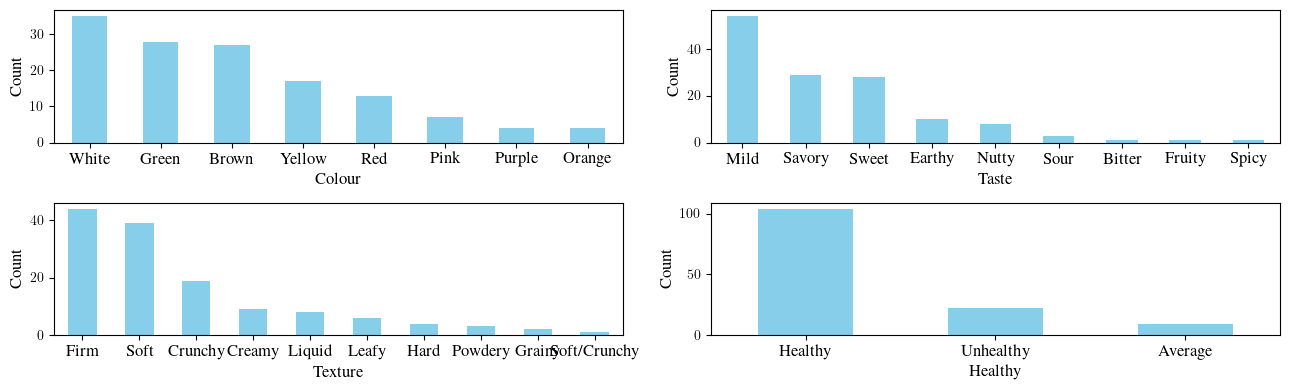

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

def plot_ingredient_data_histograms(ingredient_df, rotation=0, fontsize=12):
    # Convert child_data to a DataFrame
    df = pd.DataFrame(ingredient_df)

    # Plotting histograms for each feature
    features = ['Colour', 'Taste', 'Texture', 'Healthy']

    fig, axes = plt.subplots(2, 2, figsize=(13, 4))
    axes = axes.flatten()

    for idx, feature in enumerate(features):
        if df[feature].dtype == 'object':
            # For categorical data
            df[feature].value_counts().plot(kind='bar', ax=axes[idx], color='skyblue')
            axes[idx].set_ylabel('Count', fontsize=fontsize)
            # Format the x-tick labels
            formatted_labels = [label.replace('_', ' ').title() if isinstance(label, str) else label for label in df[feature].value_counts().index]
            axes[idx].set_xticklabels(formatted_labels, rotation=rotation, fontsize=fontsize)
        else:
            # For numerical data
            df[feature].plot(kind='hist', ax=axes[idx], bins=range(8, 13), color='skyblue')
            axes[idx].set_ylabel('Frequency', fontsize=fontsize)
            axes[idx].set_xticks(range(8, 13))
            axes[idx].tick_params(axis='x', labelsize=fontsize)

        # Capitalize and remove underscores in the feature name for xlabel
        formatted_feature = feature.replace('_', ' ').title()
        # axes[idx].set_title(f'Histogram of {formatted_feature}', fontsize=fontsize)
        axes[idx].set_xlabel(formatted_feature, fontsize=fontsize)

    plt.tight_layout()
    plt.show()
# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

    
from utils.process_data import get_data
ingredient_df = get_data("data.csv")


plot_ingredient_data_histograms(ingredient_df)


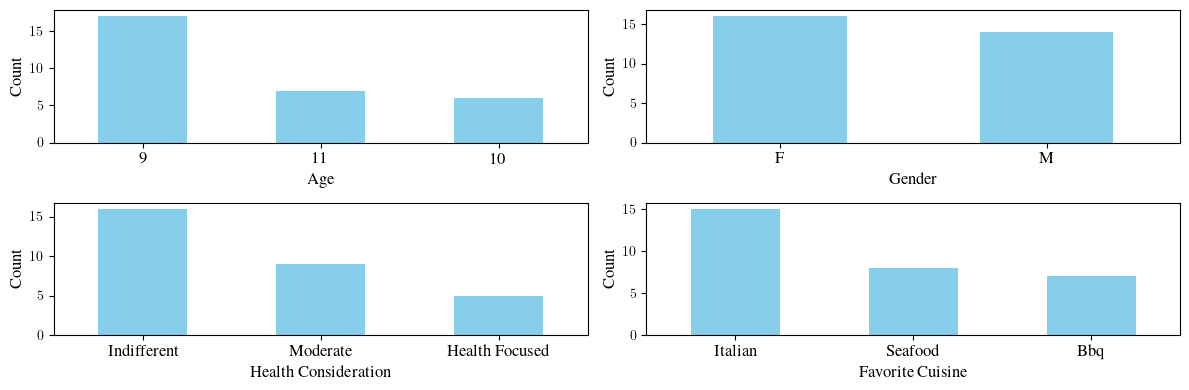

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

def plot_child_data_histograms(child_data, rotation=0, fontsize=12):
    # Convert child_data to a DataFrame
    df = pd.DataFrame(child_data).T

    # Plotting histograms for each feature
    features = ['age', 'gender', 'health_consideration', 'favorite_cuisine']

    fig, axes = plt.subplots(2, 2, figsize=(12, 4))
    axes = axes.flatten()

    for idx, feature in enumerate(features):
        if df[feature].dtype == 'object':
            # For categorical data
            df[feature].value_counts().plot(kind='bar', ax=axes[idx], color='skyblue')
            axes[idx].set_ylabel('Count', fontsize=fontsize)
            # Format the x-tick labels
            formatted_labels = [label.replace('_', ' ').title() if isinstance(label, str) else label for label in df[feature].value_counts().index]
            axes[idx].set_xticklabels(formatted_labels, rotation=rotation, fontsize=fontsize)
        else:
            # For numerical data
            df[feature].plot(kind='hist', ax=axes[idx], bins=range(8, 13), color='skyblue')
            axes[idx].set_ylabel('Frequency', fontsize=fontsize)
            axes[idx].set_xticks(range(8, 13))
            axes[idx].tick_params(axis='x', labelsize=fontsize)

        # Capitalize and remove underscores in the feature name for xlabel
        formatted_feature = feature.replace('_', ' ').title()
        # axes[idx].set_title(f'Histogram of {formatted_feature}', fontsize=fontsize)
        axes[idx].set_xlabel(formatted_feature, fontsize=fontsize)

    plt.tight_layout()
    plt.show()
# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

    
child_data = get_child_data()
plot_child_data_histograms(child_data)


### Child Preference Data

The dataset consists of generated preferences for n children. In a real-world context, such data could be gathered through questionnaires or feedback after meals. For this example, the data is synthesized based on multiple studies that explore factors influencing children's food preferences. Each child is assigned a score for each ingredient, derived from their individual characteristics, and a label indicating whether they like, are neutral towards, or dislike the ingredient. There is also a random element added. While the influence of these factors is not precisely accurate and would require refinement in a real-world setting, they serve as a foundational basis for analysis in this research. The function also splits the data, which will be used to determine if the feedback can predict the rest of the children's preferences.

Reference: [Study on children's vegetable preferences](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6173934/)

## Add more references when writing


In [6]:
import random
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Any, Tuple

def get_modifiers(
    features: Dict[str, Any],
    ingredient_row: pd.Series,
    health_consideration_modifiers: Dict[str, Dict[str, float]],
    favorite_cuisine_modifiers: Dict[str, Dict[str, float]],
    taste_modifiers: Dict[str, float],
    colour_modifiers: Dict[str, float],
    gender_modifiers: Dict[str, float],
    age_modifiers: Dict[int, float],
    texture_modifiers: Dict[str, float],
    other_modifiers: Dict[str, Any],
    vegetable_groups: Dict[str, list],
    group_probabilities_modifiers: Dict[str, float]
) -> float:
    health_consideration = features["health_consideration"]
    age = features["age"]
    gender = features["gender"]
    favorite_cuisine = features["favorite_cuisine"]

    health_category = ingredient_row["Healthy"]
    ingredient_category1 = ingredient_row["Category1"]
    taste = ingredient_row["Taste"]
    colour = ingredient_row["Colour"]
    texture = ingredient_row["Texture"]
    ingredient = ingredient_row["Category7"]

    health_mod = health_consideration_modifiers[health_consideration][health_category]
    favorite_mod = favorite_cuisine_modifiers.get(favorite_cuisine, {}).get(ingredient_category1, 1)
    taste_mod = taste_modifiers.get(taste, taste_modifiers["Misc"])
    colour_mod = colour_modifiers[colour]
    texture_mod = texture_modifiers[texture]
    gender_mod = gender_modifiers[gender]
    age_mod = age_modifiers[age]

    group_name = next((group for group, ingredients in vegetable_groups.items() if ingredient in ingredients), None)
    group_mod = group_probabilities_modifiers.get(group_name, 1)

    fruit_mod = other_modifiers["fruit_factor"] if ingredient_category1 == "Fruits and fruit products" else 1
    vegetable_mod = other_modifiers["vegetables_factor"][gender] if ingredient_category1 == "Vegetables and vegetable products" else 1
    meat_mod = other_modifiers["meat_factor"][gender] if ingredient_category1 == "Meat and meat products" else 1
    random_mod = random.uniform(other_modifiers["random_factor"][0], other_modifiers["random_factor"][1])

    return (health_mod * favorite_mod * taste_mod * colour_mod * gender_mod * age_mod * 
            texture_mod * group_mod * fruit_mod * vegetable_mod * meat_mod * random_mod)

def initialize_children_data(child_data: Dict[str, Dict[str, Any]], ingredient_df: pd.DataFrame, split: float = 0.8, seed: int = None, plot_graphs: bool = False) -> Tuple[Dict[str, Dict[str, list]], Dict[str, Dict[str, list]]]:
    random.seed(seed)
    children_data = {}
    all_scores = []
    all_preferences = {"likes": [], "neutral": [], "dislikes": []}

    # Factors affecting preferences with modifier values (increased impact)
    health_consideration_modifiers = {
        "very health conscious": {"healthy": 1.5, "average": 1, "unhealthy": 0.5},
        "moderately health conscious": {"healthy": 1.3, "average": 1, "unhealthy": 0.7},
        "don't care": {"healthy": 0.7, "average": 1, "unhealthy": 1.3},
    }

    favorite_cuisine_modifiers = {
        "BBQ": {"Meat and meat products": 1.4},
        "Seafood": {"Fish seafood amphibians reptiles and invertebrates": 1.4},
        "Italian": {"Anchovies": 1.4, "Aubergines": 1.4, "Noodles": 1.4, "Pasta plain (not stuffed) uncooked": 1.4, "Pasta wholemeal": 1.4, "Tomatoes": 1.4},
    }

    taste_modifiers = {
        "Sweet": 1.3,
        "Salty": 1.3,
        "Sour": 0.7,
        "Earthy": 0.7,
        "Misc": 1,
    }

    colour_modifiers = {
        "Red": 1.3,
        "Green": 1.3,
        "Yellow": 1.2,
        "Orange": 1.2,
        "Pink": 1,
        "Purple": 1,
        "White": 0.8,
        "Brown": 0.8,
    }

    gender_modifiers = {
        "M": 0.7,
        "F": 1.3,
    }

    age_modifiers = {
        9: 0.7,
        10: 1,
        11: 1.3,
    }

    texture_modifiers = {
        "Crunchy": 0.7,
        "Soft": 1.3,
        "Soft/Crunchy": 0.6,
        "Firm": 1.3,
        "Leafy": 1,
        "Grainy": 1,
        "Liquid": 1,
        "Powdery": 1,
        "Creamy": 1,
        "Hard": 1,
    }

    other_modifiers = {
        "fruit_factor": 1.3,
        "vegetables_factor": {"M": 0.7, "F": 1.3},
        "meat_factor": {"M": 1.3, "F": 0.7},
        "random_factor": [0.7, 1.3]
    }

    vegetable_groups = {
        "Group A": ["Tomatoes", "Sweet corn", "Sweet potatoes", "Carrots"],
        "Group B": ["Onions", "Spring onions", "Pepper"],
        "Group C": ["Cauliflowers"],
        "Group D": ["Courgettes", "Spinaches", "Curly kales", "Peas"],
        "Group E": ["Beetroots", "Lettuces (generic)", "Broccoli"],
        "Group F": ["Aubergines", "Cucumber", "White cabbage", "Savoy cabbages", "Red cabbage", "Runner beans (with pods)"],
    }

    group_probabilities_modifiers = {
        "Group A": 1.4,
        "Group B": 1.3,
        "Group C": 0.7, 
        "Group D": 1, 
        "Group E": 0.9, 
        "Group F": 0.9 
    }

    for child_key, features in child_data.items():
        preferences = {"likes": [], "neutral": [], "dislikes": []}
        child_scores = []

        for _, row in ingredient_df.iterrows():
            score = get_modifiers(features, row, health_consideration_modifiers, favorite_cuisine_modifiers, taste_modifiers,
                                  colour_modifiers, gender_modifiers, age_modifiers, texture_modifiers, other_modifiers,
                                  vegetable_groups, group_probabilities_modifiers)
            child_scores.append((row["Category7"], score))

        child_scores.sort(key=lambda x: x[1], reverse=True)
        all_scores.extend(child_scores)

        num_ingredients = len(child_scores)
        num_likes = int(0.6 * num_ingredients)
        num_neutral = int(0.2 * num_ingredients)
        num_dislikes = num_ingredients - num_likes - num_neutral

        preferences["likes"] = [ingredient for ingredient, _ in child_scores[:num_likes]]
        preferences["neutral"] = [ingredient for ingredient, _ in child_scores[num_likes:num_likes + num_neutral]]
        preferences["dislikes"] = [ingredient for ingredient, _ in child_scores[num_likes + num_neutral:]]

        all_preferences["likes"].extend(preferences["likes"])
        all_preferences["neutral"].extend(preferences["neutral"])
        all_preferences["dislikes"].extend(preferences["dislikes"])

        children_data[child_key] = preferences

    all_data = {}

    for child_key, preferences in children_data.items():
        known_preferences = {"likes": [], "neutral": [], "dislikes": []}
        unknown_preferences = {"likes": [], "neutral": [], "dislikes": []}

        for category in ["likes", "neutral", "dislikes"]:
            total_items = len(preferences[category])
            split_index = int(total_items * split)
            known_preferences[category] = preferences[category][:split_index]
            unknown_preferences[category] = preferences[category][split_index:]

        all_data[child_key] = {
            "known": known_preferences,
            "unknown": unknown_preferences
        }

    if plot_graphs:
        plot_histograms(all_scores, all_preferences)

    return all_data

def plot_histograms(scores: list, preferences: Dict[str, list]) -> None:
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.hist([score for ingredient, score in scores if ingredient in preferences["likes"]], bins=20, color='green', alpha=0.7, label='Like')
    plt.title('Like Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.hist([score for ingredient, score in scores if ingredient in preferences["neutral"]], bins=20, color='blue', alpha=0.7, label='Neutral')
    plt.title('Neutral Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.hist([score for ingredient, score in scores if ingredient in preferences["dislikes"]], bins=20, color='red', alpha=0.7, label='Dislike')
    plt.title('Dislike Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [7]:
# from models.preferences.data_utils import get_child_data, initialize_children_data
from utils.process_data import get_data

ingredient_df = get_data()

all_preferences = initialize_children_data(get_child_data(), ingredient_df, seed=None, plot_graphs=False)

print(all_preferences)

Successfully read 27 lines from the file. Loaded 26 ingredients.


KeyError: 'indifferent'

### Child Feedback

The comments are designed to test the sentiment analysis capabilities of language models and determine if child preferences can be identified through feedback. The comments discuss multiple ingredients, allowing us to evaluate whether the sentiment towards each ingredient can be accurately measured through relatively simple sentiment analysis. Additionally, they help monitor how satisfaction with the meal plan will evolve over time. In reality, the comments wouldn't be as perfectly structured as they are here, but this serves as a good starting point. Feedback is provided based on the known and unknown preferences of the child. These comments will then be used to update the known preference list. 

In [ ]:
import numpy as np
import random
from typing import Dict

def get_feedback(preferences: Dict[str, Dict[str, list]], ingredient_list: list, seed=None):
    # Function to get feedback on meal plan which gives randomized comments on the ingredients for each child.
    # The function also sometimes doesn't provide feedback for some children. 
    comments = [
        ("Didn't like the {} and {} in the dish, but the {} was tasty.", ["dislikes", "dislikes", "likes"]),
        ("Did not enjoy the {} and {}.", ["dislikes", "dislikes"]),
        ("Enjoyed the {} and {}, but was okay with the {}.", ["likes", "likes", "neutral"]),
        ("Loved the {}, but didn't like the {} and {}.", ["likes", "dislikes", "dislikes"]),
        ("The {} was great, but the {} was average.", ["likes", "neutral"]),
        ("Didn't enjoy the {}, but the {} was average..", ["dislikes", "neutral"]),
        ("Loved the {} and {}, but not the {}.", ["likes", "likes", "dislikes"]),
        ("Loved the {}, but the {} was not appealing.", ["likes", "dislikes"]),
        ("Enjoyed the {}, but the {} was not liked.", ["likes", "dislikes"]),
        ("Didn't like the {}, {} and {} together.", ["dislikes", "dislikes", "dislikes"]),
        ("Really liked the {} with {} and the {} was tasty.", ["likes", "likes", "likes"]),
        ("Didn't like the {} in the dish, but the {} was fine.", ["dislikes", "neutral"]),
        ("Enjoyed the {} and {}, but not the {}.", ["likes", "likes", "dislikes"]),
        ("Didn't like the {} and {}.", ["dislikes", "dislikes"]),
        ("The {} and {} were amazing, but didn't enjoy the {} much.", ["likes", "likes", "dislikes"]),
        ("Loved the {} and {}, but not the {}.", ["likes", "likes", "dislikes"]),
        ("Didn't enjoy the {} much, but the {} was okay.", ["dislikes", "neutral"]),
        ("The {} and {} dish was great.", ["likes", "likes"]),
        ("Didn't like the {}.", ["dislikes"]),
        ("Enjoyed the {} and {}.", ["likes", "likes"]),
        ("Loved the {} and {}.", ["likes", "likes"]),
        ("Didn't like the {} and the {}.", ["dislikes", "dislikes"]),
        ("Enjoyed the {} and {}, but the {} was okay.", ["likes", "likes", "neutral"]),
        ("Didn't like the {} and {} in the dish.", ["dislikes", "dislikes"]),
        ("Didn't like the {}, but the {} was okay.", ["dislikes", "neutral"]),
        ("Enjoyed the {} and {}, but didn't like the {}.", ["likes", "likes", "dislikes"]),
        ("Didn't like the {}.", ["dislikes"]),
        ("Loved the {} and {}, but the {} was not liked.", ["likes", "likes", "dislikes"]),
        ("Didn't like the {}, but the {} was okay.", ["dislikes", "neutral"]),
        ("Enjoyed the {} and {}.", ["likes", "likes"]),
        ("Liked the {} but not the {}.", ["likes", "dislikes"]),
        ("The {} was fine, but the {} wasn't good.", ["neutral", "dislikes"]),
        ("The {} and {} were great, but the {} was not.", ["likes", "likes", "dislikes"]),
        ("The {} was tasty, but the {} wasn't.", ["likes", "dislikes"]),
        ("The {} was okay, but the {} wasn't appealing.", ["neutral", "dislikes"]),
        ("Didn't like the {}, but the {} was good.", ["dislikes", "likes"]),
        ("The {} and {} were okay, but the {} wasn't.", ["neutral", "neutral", "dislikes"]),
        ("Really liked the {}, but the {} was too strong.", ["likes", "dislikes"]),
        ("Enjoyed the {}, but the {} was too bland.", ["likes", "dislikes"]),
        ("The {} was fine, but the {} needed more flavor.", ["neutral", "dislikes"]),
        ("Loved the {}, but the {} was not good.", ["likes", "dislikes"]),
        ("Didn't enjoy the {}, but the {} was okay.", ["dislikes", "neutral"]),
        ("The {} was good, but the {} was not to my taste.", ["likes", "dislikes"]),
        ("Enjoyed the {}, but the {} was too overpowering.", ["likes", "dislikes"]),
        ("The {} was delicious, but the {} wasn't enjoyable.", ["likes", "dislikes"])
    ]
    

    random.seed(seed)
    feedback = {}

    for child, prefs in preferences.items():  # Iterate over each child and their preferences
        
        # Combine known and unknown preferences for likes, neutral, and dislikes
        available_ingredients = {
            "likes": prefs['known']['likes'] + prefs['unknown']['likes'],
            "neutral": prefs['known']['neutral'] + prefs['unknown']['neutral'],
            "dislikes": prefs['known']['dislikes'] + prefs['unknown']['dislikes'],
        }

        valid_comments = []  # Initialize the list of valid comments

        # Iterate over each comment template and its corresponding feedback types
        for comment_template, feedback_types in comments:
            matched_ingredients = []  # Initialize the list of matched ingredients
            used_ingredients = set()  # Initialize the set of used ingredients

            # Match ingredients according to feedback types
            for feedback_type in feedback_types:
                for category in available_ingredients:
                    if feedback_type in category:  # Check if the feedback type matches the category
                        # List possible ingredients not yet used
                        possible_ingredients = [ingredient for ingredient in ingredient_list if ingredient in available_ingredients[category] and ingredient not in used_ingredients]
                        if possible_ingredients:  # If there are possible ingredients
                            chosen_ingredient = random.choice(possible_ingredients)  # Randomly select an ingredient
                            matched_ingredients.append(chosen_ingredient)  # Add the chosen ingredient to the matched list
                            used_ingredients.add(chosen_ingredient)  # Mark the ingredient as used
                            break  # Break after finding a valid ingredient

            # Check if we have matched the required number of ingredients
            if len(matched_ingredients) == len(feedback_types):
                valid_comments.append((comment_template, matched_ingredients, feedback_types))  # Add to valid comments if matches found

        # Select a random valid comment from the list of valid comments
        if valid_comments:
            comment_template, matched_ingredients, feedback_types = random.choice(valid_comments)  # Randomly select a valid comment
            comment = comment_template.format(*matched_ingredients)  # Format the comment with matched ingredients
            correct_action = {ingredient: feedback_types[idx] for idx, ingredient in enumerate(matched_ingredients)}
            feedback[child] = {"comment": comment, "correct_action": correct_action}  # Add the comment to the child's feedback

    return feedback  # Return the feedback dictionary


In [ ]:
from models.preferences.preference_utils import get_child_data, initialize_children_data, get_feedback
from utils.process_data import get_data

ingredient_df = get_data()
preferences = initialize_children_data(get_child_data(), ingredient_df, seed=None, plot_graphs=False, split = 0.2)

# print("Known:", preferences['child1']['known'])
# print("Unknown:", preferences['child1']['unknown'])

# # Example usage       # like             # dislike              # like                         # dislike                     # dislike
ingredient_list = ['Sweet potatoes', 'Rice grain brown', 'Cow ox or bull fresh meat', 'Wheat bread and rolls brown or wholemeal', 'Aubergines']
                # [like, dislike, like, like, dislike]
feedback = get_feedback(preferences, ingredient_list, seed=None)

for child, details in feedback.items():
    print(f"{child}: {details['comment']}")
    print(details['correct_action'])


##  Sentiment analysis

Use to take comments and update preferences, by finding what ingredients they speak positively about and don't 

In [ ]:
import re
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def extract_preferences_and_update_data(preferences, feedback, ingredient_list, plot_confusion_matrix=False):
    changes = []
    incorrect_comments = []
    true_labels = []
    pred_labels = []
    
    # Mapping for confusion matrix
    label_mapping = {'likes': 0, 'neutral': 1, 'dislikes': 2}
    
    # Iterate over each child's feedback
    for child, fb in feedback.items():
        # Split comments into sentences based on punctuation
        comments = re.split(r'[,.!?]', fb["comment"].lower())
        correct_action = fb["correct_action"]
        
        # Analyze each comment's sentiment
        for sentence in comments:
            if sentence.strip():  # Check if the sentence is not empty
                pred_label = analyze_sentiment(sentence.strip())
                
                # Check for mentions of each ingredient in the sentence
                for ingredient in ingredient_list:
                    if ingredient.lower() in sentence:
                        change = {"child": child, "ingredient": ingredient, "change": ""}
                        
                        # Determine the appropriate category based on polarity
                        if pred_label == 'likes':  
                            if ingredient not in preferences[child]['known']["likes"]:
                                preferences[child]['known']["likes"].append(ingredient)
                                change["change"] = "added to likes"
                        elif pred_label == 'dislikes':
                            if ingredient not in preferences[child]['known']["dislikes"]:
                                preferences[child]['known']["dislikes"].append(ingredient)
                                change["change"] = "added to dislikes"
                        else:
                            pred_label = 'neutral'
                            if ingredient not in preferences[child]['known']["neutral"]:
                                preferences[child]['known']["neutral"].append(ingredient)
                                change["change"] = "added to neutral"
                        
                        # Remove ingredient from other lists
                        if change["change"]:
                            if change["change"] != "added to likes" and ingredient in preferences[child]['known']["likes"]:
                                preferences[child]['known']["likes"].remove(ingredient)
                                change["change"] += ", removed from likes"
                            if change["change"] != "added to dislikes" and ingredient in preferences[child]['known']["dislikes"]:
                                preferences[child]['known']['dislikes'].remove(ingredient)
                                change["change"] += ", removed from dislikes"
                            if change["change"] != "added to neutral" and ingredient in preferences[child]['known']["neutral"]:
                                preferences[child]['known']["neutral"].remove(ingredient)
                                change["change"] += ", removed from neutral"
                            
                            changes.append(change)
                        
                        true_labels.append(correct_action[ingredient])
                        pred_labels.append(pred_label)
                        
                        # Check if the prediction was incorrect
                        if pred_label != correct_action[ingredient]:
                            incorrect_comments.append({
                                "child": child,
                                "comment": sentence,
                                "predicted": pred_label,
                                "actual": correct_action[ingredient]
                            })

    # Calculate accuracy
    correct_actions = sum(1 for true, pred in zip(true_labels, pred_labels) if true == pred)
    total_actions = len(true_labels)
    accuracy = correct_actions / total_actions if total_actions > 0 else 0

    # Plot confusion matrix if flag is set
    if plot_confusion_matrix and total_actions > 0:
        cm = confusion_matrix([label_mapping[label] for label in true_labels], 
                              [label_mapping[label] for label in pred_labels], 
                              labels=[0, 1, 2])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['likes', 'neutral', 'dislikes'])
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.show()

    return changes, preferences, accuracy, incorrect_comments


# Function to display the changes made to children's preferences
def display_changes(changes):
    for change in changes:
        print("Action Taken:\n")
        print(f"Child {change['child']} had {change['ingredient']} {change['change']}.")
        
# Function to display incorrect comments and reasons
def display_incorrect_comments(incorrect_comments):
    for comment in incorrect_comments:
        print(f"Child {comment['child']} commented: '{comment['comment']}'")
        print(f"Predicted: {comment['predicted']}, Actual: {comment['actual']}\n")

### Text Blob Method

Fast but doesn't completley capture all the context around ingredients

In [ ]:
from textblob import TextBlob

# Function to analyze the sentiment of a comment
def analyze_sentiment(comment):
    # Create a TextBlob object from the comment
    analysis = TextBlob(comment)
    # Get the polarity of the comment's sentiment (-1 to 1)
    polarity = analysis.sentiment.polarity
    # Determine sentiment category
    if polarity > 0.1:
        return 'likes'
    elif polarity < -0.1:
        return 'dislikes'
    else:
        return 'neutral'


In [ ]:
from models.preferences.preference_utils import get_child_data, initialize_children_data, get_feedback
from utils.process_data import get_data

ingredient_df = get_data()
preferences = initialize_children_data(get_child_data(), ingredient_df, seed=None, plot_graphs=False, split = 0.2)

# # Example usage       # like             # dislike              # like                         # dislike                     # dislike
ingredient_list = ['Sweet potatoes', 'Rice grain brown', 'Cow ox or bull fresh meat', 'Wheat bread and rolls brown or wholemeal', 'Aubergines']
                # [like, dislike, like, like, dislike]
feedback = get_feedback(preferences, ingredient_list, seed=None)

# Extract preferences and update data
changes, preferences, accuracy, incorrect_comments = extract_preferences_and_update_data(preferences, feedback, ingredient_list, plot_confusion_matrix=True)
print(f"Accuracy: {accuracy:.2f}")
# Display the changes
# for change in changes:
#     print(f"Child {change['child']} had {change['ingredient']} {change['change']}.")

display_incorrect_comments(incorrect_comments)

### Vader

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Function to analyze the sentiment of a comment using VADER
def analyze_sentiment(comment):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(comment)
    
    # Remove the 'compound' score from the dictionary
    vs.pop('compound')

    # Determine sentiment category based on the highest probability
    sentiment = max(vs, key=vs.get)
    if sentiment == 'pos':
        return 'likes'
    elif sentiment == 'neg':
        return 'dislikes'
    else:
        return 'neutral'


In [ ]:
import logging
import numpy as np
import matplotlib.pyplot as plt
from models.preferences.preference_utils import (
    get_child_data,
    initialize_child_preference_data,
    print_preference_difference_and_accuracy,
    calculate_percent_of_known_ingredients_to_unknown,
)
from utils.process_data import get_data
from models.preferences.prediction import PreferenceModel
from models.preferences.voting import IngredientNegotiator
from models.preferences.sentiment_analysis import SentimentAnalyzer
from models.preferences.menu_generator import RandomMenuGenerator

logging.basicConfig(level=logging.CRITICAL, format='%(asctime)s - %(levelname)s - %(message)s')

weight_function='simple'
iterations=50 
seed=None

"""Main function to run the preference prediction and negotiation pipeline."""

ingredient_df = get_data("data.csv")
child_feature_data = get_child_data()
child_preference_data = initialize_child_preference_data(
    child_feature_data, ingredient_df, split=0.5, seed=seed, plot_graphs=False
)

# Lists to store accuracy values
prediction_accuracies = []
prediction_std = []
sentiment_accuracies = []
percent_knowns = []
previous_feedback = {}
previous_fairness_index = {}
previous_utility = {}

# Initialize menu generator
menu_generator = RandomMenuGenerator(seed=seed)

# Initial Prediction of Preferences
predictor = PreferenceModel(
    ingredient_df, child_feature_data, child_preference_data, apply_SMOTE=True, seed=seed
)
updated_known_and_predicted_preferences = predictor.run_pipeline()

accuracy, std_dev = print_preference_difference_and_accuracy(
    child_preference_data, updated_known_and_predicted_preferences, summary_only=True
)

prediction_accuracies.append(accuracy)
prediction_std.append(std_dev)

# Initial Negotiation of Ingredients
negotiator = IngredientNegotiator(
    seed, ingredient_df, updated_known_and_predicted_preferences, previous_feedback, previous_fairness_index, previous_utility
)

if weight_function == "simple":
    # Simple
    negotiated, unavailable = negotiator.negotiate_ingredients_simple()
elif weight_function == "complex":
    # Complex
    negotiated, unavailable = negotiator.negotiate_ingredients_complex()
else:
    raise ValueError("Invalid weight function")

# # Close negotiator to get initial gini stats on voting
# negotiator.close(log_file=f"Gini_iteration_{i + 1}.json")

# Generate random menu
menu_plan = menu_generator.generate_random_menu(negotiated, unavailable)

# Sentiment analysis and get updated preference list
sentiment_analyzer = SentimentAnalyzer(
    child_preference_data, menu_plan, seed=seed
)
(
    updated_true_preferences_with_feedback,
    sentiment_accuracy,
    feedback_given,
) = sentiment_analyzer.get_sentiment_and_update_data(plot_confusion_matrix=False)
percent_known, total_preferences = calculate_percent_of_known_ingredients_to_unknown(updated_true_preferences_with_feedback)
percent_knowns.append(percent_known)
print(total_preferences)

logging.info(f"Iteration {1} - Sentiment Accuracy: {sentiment_accuracy}")

sentiment_accuracies.append(sentiment_accuracy)


feedback = get_feedback(preferences, ingredient_list, seed=None)

# Extract preferences and update data
changes, preferences, accuracy, incorrect_comments = extract_preferences_and_update_data(preferences, feedback, ingredient_list, plot_confusion_matrix=True)
print(f"Accuracy: {accuracy:.2f}")
# Display the changes
# for change in changes:
#     print(f"Child {change['child']} had {change['ingredient']} {change['change']}.")

display_incorrect_comments(incorrect_comments)



### Hugging Face Transformer Model

In [ ]:
from transformers import pipeline
import torch

# Check if GPU is available and set device accordingly
device = 0 if torch.cuda.is_available() else -1
# Load the sentiment analysis pipeline with a specific model
# sentiment_analyzer = pipeline('sentiment-analysis', model="finiteautomata/bertweet-base-sentiment-analysis", device=device)

sentiment_analyzer = pipeline('sentiment-analysis', model="cardiffnlp/twitter-roberta-base-sentiment", device=device)

def analyze_sentiment(comment):
    result = sentiment_analyzer(comment)
    label = result[0]['label']

    if label == 'POS':
        return 'likes'
    elif label == 'NEG':
        return 'dislikes'
    else:
        return 'neutral'

In [ ]:
from models.preferences.preference_utils import get_child_data, initialize_children_data, get_feedback
from utils.process_data import get_data


ingredient_df = get_data()
preferences = initialize_children_data(get_child_data(), ingredient_df, seed=None, plot_graphs=False, split = 0.2)

# # Example usage       # like             # dislike              # like                         # dislike                     # dislike
ingredient_list = ['Sweet potatoes', 'Rice grain brown', 'Cow ox or bull fresh meat', 'Wheat bread and rolls brown or wholemeal', 'Aubergines']
                # [like, dislike, like, like, dislike]
feedback = get_feedback(preferences, ingredient_list, seed=None)

# Extract preferences and update data
changes, preferences, accuracy, incorrect_comments = extract_preferences_and_update_data(preferences, feedback, ingredient_list, plot_confusion_matrix=True)
print(f"Accuracy: {accuracy:.2f}")
# Display the changes
# for change in changes:
#     print(f"Child {change['child']} had {change['ingredient']} {change['change']}.")

display_incorrect_comments(incorrect_comments)



## Collaborative Filtering

 ### Main Functions

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Define utility matrix function
def get_utility_matrix(children, ingredients, preferences):
    utility_matrix = np.zeros((len(children), len(ingredients)))
    for i, child in enumerate(children):
        for j, ingredient in enumerate(ingredients):
            if ingredient in preferences[child]['known']["likes"]:
                utility_matrix[i, j] = 1  # Likes are marked with 1
            elif ingredient in preferences[child]['known']["neutral"]:
                utility_matrix[i, j] = 0  # Neutral is marked with 0
            elif ingredient in preferences[child]['known']["dislikes"]:
                utility_matrix[i, j] = -1  # Dislikes are marked with -1
    return utility_matrix

# Define the function to create the known mask
def create_known_mask(target_child, ingredients, preferences):
    known_ingredients = (preferences[target_child]['known']['likes'] + 
                         preferences[target_child]['known']['neutral'] + 
                         preferences[target_child]['known']['dislikes'])
    known_mask = np.isin(ingredients, known_ingredients)
    return known_mask

# Define the user-based prediction function
def predict_preferences_user_based(target_child_index, user_similarity_matrix, utility_matrix, ingredients, preferences, clf):
    target_child = 'child' + str(target_child_index + 1)
    weighted_sum = np.dot(user_similarity_matrix[target_child_index], utility_matrix)
    sum_of_weights = np.sum(user_similarity_matrix[target_child_index])
    predicted_preferences = weighted_sum / sum_of_weights if sum_of_weights != 0 else np.zeros(len(ingredients))
    
    # Feature scaling
    scaler = StandardScaler()
    X = scaler.fit_transform(predicted_preferences.reshape(-1, 1))
    y = utility_matrix[target_child_index]
    
    
    known_mask = create_known_mask(target_child, ingredients, preferences)
    
    if np.sum(known_mask) < 2:  # Ensure we have at least two classes for training
        return np.full(len(ingredients), -1)
    
    clf.fit(X[known_mask], y[known_mask])
    predicted_classes = clf.predict(X)
    return predicted_classes

# Define the item-based prediction function
def predict_preferences_item_based(target_child_index, item_similarity_matrix, utility_matrix, ingredients, preferences, clf):
    target_child = 'child' + str(target_child_index + 1)
    # Get the preferences of the target child
    child_preferences = utility_matrix[target_child_index]
    
    # Calculate the weighted sum of item similarities for each item
    weighted_sum = np.dot(item_similarity_matrix, child_preferences)
    
    # Calculate the sum of weights for normalization
    sum_of_weights = np.sum(item_similarity_matrix, axis=1)
    
    # Normalize the weighted sum to get predicted preferences
    # Handle cases where sum_of_weights is zero
    predicted_preferences = np.divide(weighted_sum, sum_of_weights, out=np.zeros_like(weighted_sum), where=sum_of_weights != 0)
    
    # Replace NaNs with 0
    predicted_preferences = np.nan_to_num(predicted_preferences)
    
    # Feature scaling
    scaler = StandardScaler()
    X = scaler.fit_transform(predicted_preferences.reshape(-1, 1))
    y = utility_matrix[target_child_index]
    
    # Only use known preferences for training
    known_mask = create_known_mask(target_child, ingredients, preferences)

    if np.sum(known_mask) < 2:  # Ensure we have at least two classes for training
        return np.full(len(ingredients), -1)
    
    clf.fit(X[known_mask], y[known_mask])
    
    # Predict the classes
    predicted_classes = clf.predict(X)
    return predicted_classes
# Define the function to evaluate predictions
def evaluate_predictions(children, ingredients, preferences, utility_matrix, similarity_matrix, predict_preferences_function, clf, plot_confusion_matrix=False):
    class_map = {-1: 'dislikes', 0: 'neutral', 1: 'likes'}
    label_mapping = {1: 0, 0: 1, -1: 2}  # Map class labels to integers for confusion matrix
    total_correct_known = 0
    total_correct_unknown = 0
    total_incorrect = 0
    total_known = 0
    total_unknown = 0
    
    true_labels = []
    pred_labels = []
    
    for target_child_index in range(len(children)):
        child_key = 'child' + str(target_child_index + 1)
        predicted_classes = predict_preferences_function(target_child_index, similarity_matrix, utility_matrix, ingredients, preferences, clf)
        ingredient_ratings = {ingredient: rating for ingredient, rating in zip(ingredients, predicted_classes)}
        
        correct_known = 0
        correct_unknown = 0
        incorrect = 0
        known = 0
        unknown = 0

        known_preferences = set(preferences[child_key]['known']['likes']) | set(preferences[child_key]['known']['dislikes']) | set(preferences[child_key]['known']['neutral'])
        unknown_preferences = set(preferences[child_key]['unknown']['likes']) | set(preferences[child_key]['unknown']['dislikes']) | set(preferences[child_key]['unknown']['neutral'])
        
        print(f"\nPreferences for {child_key}:")
        for ingredient, rating in ingredient_ratings.items():
            is_correct = False
            true_label = None
            if ingredient in known_preferences:
                if ingredient in preferences[child_key]['known']["likes"]:
                    true_label = 1
                elif ingredient in preferences[child_key]['known']["neutral"]:
                    true_label = 0
                elif ingredient in preferences[child_key]['known']["dislikes"]:
                    true_label = -1
            elif ingredient in unknown_preferences:
                if ingredient in preferences[child_key]['unknown']["likes"]:
                    true_label = 1
                elif ingredient in preferences[child_key]['unknown']["neutral"]:
                    true_label = 0
                elif ingredient in preferences[child_key]['unknown']["dislikes"]:
                    true_label = -1

            true_labels.append(true_label)
            pred_labels.append(rating)

            if rating in class_map:
                if ingredient in preferences[child_key]['unknown'].get(class_map[rating], []):
                    print(f"{ingredient}: {rating}.  CORRECT, UNKNOWN")
                    correct_unknown += 1
                    unknown += 1
                    is_correct = True
                elif ingredient in preferences[child_key]['known'].get(class_map[rating], []):
                    print(f"{ingredient}: {rating}.  CORRECT, KNOWN")
                    correct_known += 1
                    known += 1
                    is_correct = True
            
            if not is_correct:
                print(f"{ingredient}: {rating}.  INCORRECT")
                incorrect += 1
                if ingredient in unknown_preferences:
                    unknown += 1
                elif ingredient in known_preferences:
                    known += 1

        total_predictions_child = correct_known + correct_unknown + incorrect
        accuracy = (correct_known + correct_unknown) / total_predictions_child if total_predictions_child > 0 else 0
        known_accuracy = (correct_known / known) if known > 0 else 0
        unknown_accuracy = (correct_unknown / unknown) if unknown > 0 else 0
        print(f"\nAccuracy Metrics for {child_key}:")
        print(f"Correct (Known): {correct_known} / {known} ({known_accuracy * 100:.2f}%)")
        print(f"Correct (Unknown): {correct_unknown} / {unknown} ({unknown_accuracy * 100:.2f}%)")
        print(f"Incorrect: {incorrect}")
        print(f"Total Predictions: {total_predictions_child}")
        print(f"Overall Accuracy: {accuracy:.2f}")
        
        total_correct_known += correct_known
        total_correct_unknown += correct_unknown
        total_incorrect += incorrect
        total_known += known
        total_unknown += unknown
    
    overall_total_predictions = total_correct_known + total_correct_unknown + total_incorrect
    overall_accuracy = (total_correct_known + total_correct_unknown) / overall_total_predictions if overall_total_predictions > 0 else 0
    overall_known_accuracy = (total_correct_known / total_known) if total_known > 0 else 0
    overall_unknown_accuracy = (total_correct_unknown / total_unknown) if total_unknown > 0 else 0
    print(f"\nOverall Accuracy Metrics:")
    print(f"Correct (Known): {total_correct_known} / {total_known} ({overall_known_accuracy * 100:.2f}%)")
    print(f"Correct (Unknown): {total_correct_unknown} / {total_unknown} ({overall_unknown_accuracy * 100:.2f}%)")
    print(f"Incorrect: {total_incorrect}")
    print(f"Total Predictions: {overall_total_predictions}")
    print(f"Overall Accuracy: {overall_accuracy:.2f}")

    # Plot confusion matrix if flag is set
    if plot_confusion_matrix and overall_total_predictions > 0:
        cm = confusion_matrix([label_mapping[label] for label in true_labels], 
                              [label_mapping[label] for label in pred_labels], 
                              labels=[0, 1, 2])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['likes', 'neutral', 'dislikes'])
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.show()

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

def get_classifier(classifier_name='RandomForest'):
    if classifier_name == 'LogisticRegression':
        solver = 'liblinear'
        class_weight = None
        C = 0.4022301244444916
        clf = LogisticRegression(solver=solver, class_weight=class_weight, C=C, max_iter=10000)
    
    elif classifier_name == 'RandomForest':
        n_estimators = 58
        max_depth = 11  
        clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    
    elif classifier_name == 'SVC':
        C = 3.5244469291048874
        kernel = 'rbf'
        clf = SVC(C=C, kernel=kernel, probability=True)
    
    elif classifier_name == 'SGDClassifier':
        alpha = 0.0018872854402943308
        max_iter = 3928  
        clf = SGDClassifier(alpha=alpha, max_iter=max_iter)
    
    elif classifier_name == 'KNeighborsClassifier':
        n_neighbors = 5
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    elif classifier_name == 'GaussianNB':
        clf = GaussianNB()
    
    elif classifier_name == 'GradientBoostingClassifier':
        n_estimators = 100
        learning_rate = 0.1
        max_depth = 3
        clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
    
    elif classifier_name == 'XGBClassifier':
        n_estimators = 100
        learning_rate = 0.1
        max_depth = 3
        clf = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
    
    elif classifier_name == 'MLPClassifier':
        hidden_layer_sizes = (100,)
        activation = 'relu'
        solver = 'adam'
        max_iter = 200
        clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, max_iter=max_iter)
    
    else:
        raise ValueError(f"Classifier {classifier_name} is not recognized.")
    
    return clf

# Best hyperparameters:  {'solver': 'lbfgs', 'class_weight': None, 'C': 6.2232422446177145}
# Best accuracy:  0.6775398303643858

# {'C': 3.5244469291048874, 'kernel': 'rbf'} SVC

# Best hyperparameters:  {'n_estimators': 58, 'max_depth': 11} RandomForest
# Best accuracy:  0.7418735389051784

# Best hyperparameters:  {'alpha': 0.0018872854402943308, 'max_iter': 3928}
# Best accuracy:  0.6574125625058961  (SGDClassifier)

Each entry in the item similarity matrix represents the cosine similarity between two ingredients. The value ranges from -1 to 1, where 1 indicates maximum similarity, 0 indicates no similarity, and -1 indicates maximum dissimilarity.

Higher similarity values between ingredients suggest that children who like (or dislike) one ingredient tend to have similar preferences for the other ingredient.

The predicted preferences array represents the estimated ratings a child would give to each ingredient, based on their current preferences and the similarities between ingredients.

Higher predicted preference values indicate a higher likelihood that the child will like the ingredient.

### User Based Collaborative Filtering

Concept: In user-based collaborative filtering, the idea is to find users who are similar to the target user based on their ratings and preferences. 

In [ ]:
# Assuming you have the functions get_child_data, get_data, and initialize_children_data
children = list(get_child_data().keys())  # Get the list of children
ingredient_df = get_data("data.csv")  # Get the ingredient data
ingredients = ingredient_df['Category7'].to_list()  # Convert ingredients to a list
preferences = initialize_children_data(get_child_data(), ingredient_df, seed=None, plot_graphs=False, split=0.5)  # Initialize children data with preferences

# Get the utility matrix based on updated preferences
utility_matrix = get_utility_matrix(children, ingredients, preferences)

# Calculate user similarity matrix
user_similarity_matrix = cosine_similarity(utility_matrix)

# Calculate item similarity matrix (using transposed utility matrix)
item_similarity_matrix = cosine_similarity(utility_matrix.T)

clf = get_classifier('SGDClassifier')
# Evaluate item-based predictions
print("\nUser-Based Predictions:")
evaluate_predictions(children, ingredients, preferences, utility_matrix, user_similarity_matrix, predict_preferences_user_based, clf, plot_confusion_matrix=True)


### Item Based Collaborative Filtering

Concept: In item-based collaborative filtering, the idea is to find items that are similar to the ones the target user has liked. Recommendations are then made based on the similarity between items.

In [ ]:
# Evaluate item-based predictions
print("\nItem-Based Predictions:")
evaluate_predictions(children, ingredients, preferences, utility_matrix, item_similarity_matrix, predict_preferences_item_based, clf, plot_confusion_matrix=True)


Item-based collaborative filtering with added features tends to be less sparse and more effective than user-based methods with added features because item features are stable, consistent, and richly described. These characteristics lead to a densely populated item similarity matrix, which can aggregate preferences more effectively and provide better coverage for recommendations. Additionally, item-based methods are more scalable and can handle sparse user interactions more gracefully, making them a preferred choice in many recommendation systems.

### Tuning

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import optuna
from sklearn.metrics import f1_score

# Define the function to evaluate predictions
def evaluate_predictions(children, ingredients, preferences, utility_matrix, similarity_matrix, predict_preferences_function, clf):
    total_correct_known = 0
    total_correct_unknown = 0
    total_incorrect = 0
    total_known = 0
    total_unknown = 0
    
    true_labels = []
    pred_labels = []
    
    for target_child_index in range(len(children)):
        child_key = "child" + str(target_child_index + 1)
        predicted_classes = predict_preferences_function(target_child_index, similarity_matrix, utility_matrix, ingredients, preferences, clf)
        ingredient_ratings = {ingredient: rating for ingredient, rating in zip(ingredients, predicted_classes)}
        
        correct_known = 0
        correct_unknown = 0
        incorrect = 0
        known = 0
        unknown = 0

        known_preferences = set(preferences[child_key]['known']['likes']) | set(preferences[child_key]['known']['dislikes']) | set(preferences[child_key]['known']['neutral'])
        unknown_preferences = set(preferences[child_key]['unknown']['likes']) | set(preferences[child_key]['unknown']['dislikes']) | set(preferences[child_key]['unknown']['neutral'])
        
        for ingredient, rating in ingredient_ratings.items():
            is_correct = False
            true_label = None
            if ingredient in known_preferences:
                if ingredient in preferences[child_key]['known']["likes"]:
                    true_label = 1
                elif ingredient in preferences[child_key]['known']["neutral"]:
                    true_label = 0
                elif ingredient in preferences[child_key]['known']["dislikes"]:
                    true_label = -1
            elif ingredient in unknown_preferences:
                if ingredient in preferences[child_key]['unknown']["likes"]:
                    true_label = 1
                elif ingredient in preferences[child_key]['unknown']["neutral"]:
                    true_label = 0
                elif ingredient in preferences[child_key]['unknown']["dislikes"]:
                    true_label = -1

            true_labels.append(true_label)
            pred_labels.append(rating)

            if ingredient in preferences[child_key]['unknown'].get('likes', []) and rating == 1:
                correct_unknown += 1
                unknown += 1
                is_correct = True
            elif ingredient in preferences[child_key]['unknown'].get('dislikes', []) and rating == -1:
                correct_unknown += 1
                unknown += 1
                is_correct = True
            elif ingredient in preferences[child_key]['unknown'].get('neutral', []) and rating == 0:
                correct_unknown += 1
                unknown += 1
                is_correct = True
            elif ingredient in preferences[child_key]['known'].get('likes', []) and rating == 1:
                correct_known += 1
                known += 1
                is_correct = True
            elif ingredient in preferences[child_key]['known'].get('dislikes', []) and rating == -1:
                correct_known += 1
                known += 1
                is_correct = True
            elif ingredient in preferences[child_key]['known'].get('neutral', []) and rating == 0:
                correct_known += 1
                known += 1
                is_correct = True
            
            if not is_correct:
                incorrect += 1
                if ingredient in unknown_preferences:
                    unknown += 1
                elif ingredient in known_preferences:
                    known += 1

        total_predictions_child = correct_known + correct_unknown + incorrect
        accuracy = (correct_known + correct_unknown) / total_predictions_child if total_predictions_child > 0 else 0
        known_accuracy = (correct_known / known) if known > 0 else 0
        unknown_accuracy = (correct_unknown / unknown) if unknown > 0 else 0
        
        total_correct_known += correct_known
        total_correct_unknown += correct_unknown
        total_incorrect += incorrect
        total_known += known
        total_unknown += unknown
    
    overall_total_predictions = total_correct_known + total_correct_unknown + total_incorrect
    overall_accuracy = (total_correct_known + total_correct_unknown) / overall_total_predictions if overall_total_predictions > 0 else 0
    overall_known_accuracy = (total_correct_known / total_known) if total_known > 0 else 0
    overall_unknown_accuracy = (total_correct_unknown / total_unknown) if total_unknown > 0 else 0
    
    # Compute the F1 score
    f1 = f1_score(true_labels, pred_labels, average='weighted')
    
    return f1
    

def objective(trial):
    
    preferences = initialize_children_data(get_child_data(), ingredient_df, seed=None, plot_graphs=False, split=0.5)  # Initialize children data with preferences
    
    # Define hyperparameters to tune
    classifier_names = ['LogisticRegression', 'RandomForest', 'SVC', 'SGDClassifier']
    classifier_name = classifier_names[3]
    # Choose between item-based or user-based recommendation
    recommendation_methods = ['item_based', 'user_based']
    recommendation_method = recommendation_methods[1]
    
    # Define classifier based on chosen name
    if classifier_name == 'LogisticRegression':
        solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear'])
        class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])
        C = trial.suggest_float('C', 0.1, 10.0)
        clf = LogisticRegression(solver=solver, class_weight=class_weight, C=C, max_iter=10000)
    elif classifier_name == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 10, 200)
        max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
        clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    elif classifier_name == 'SVC':
        C = trial.suggest_float('C', 0.1, 10.0)
        kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
        clf = SVC(C=C, kernel=kernel, probability=True)
    else:  # SGDClassifier
        alpha = trial.suggest_float('alpha', 0.00001, 0.1)
        max_iter = trial.suggest_int('max_iter', 1000, 10000)
        clf = SGDClassifier(alpha=alpha, max_iter=max_iter)
    
    # Get the utility matrix based on updated preferences
    utility_matrix = get_utility_matrix(children, ingredients, preferences)

    # Compute the appropriate similarity matrix
    if recommendation_method == 'item_based':
        item_similarity_matrix = cosine_similarity(utility_matrix.T)
        similarity_matrix = item_similarity_matrix
        predict_preferences_function = predict_preferences_item_based
    else:  # user_based
        user_similarity_matrix = cosine_similarity(utility_matrix)
        similarity_matrix = user_similarity_matrix
        predict_preferences_function = predict_preferences_user_based
    
    # Evaluate the model using the provided function
    f1 = evaluate_predictions(
        children, ingredients, preferences, utility_matrix, similarity_matrix, predict_preferences_function, clf
    )
    
    return f1

from models.preferences.preference_utils import get_child_data, initialize_children_data
from utils.process_data import get_data

children = list(get_child_data().keys())  # Get the list of children
ingredient_df = get_data("data.csv")  # Get the ingredient data
ingredients = ingredient_df['Category7'].to_list()  # Convert ingredients to a list


# Create Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

print("Best hyperparameters: ", study.best_params)
print("Best accuracy: ", study.best_value)


### ML Method

Use a classifier to predict if a child will like an ingredient based on all features

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

def get_data_preprocessor():
    preprocessor = ColumnTransformer(
        transformers=[
            ("age", OneHotEncoder(), ["age"]),
            ("gender", OneHotEncoder(), ["gender"]),
            ("health_consideration", OneHotEncoder(), ["health_consideration"]),
            ("favorite_cuisine", OneHotEncoder(), ["favorite_cuisine"]),
            ("type", OneHotEncoder(), ["type"]),
            ("colour", OneHotEncoder(), ["colour"]),
            ("taste", OneHotEncoder(), ["taste"]),
            ("texture", OneHotEncoder(), ["texture"]),
            ("healthy", OneHotEncoder(), ["healthy"]),
        ],
    )
    return preprocessor
# Function to prepare data for the machine learning model
def prepare_ml_data(preferences, ingredient_df, child_data, apply_SMOTE=False, seed=42):
    # Create a DataFrame from child_data
    child_df = pd.DataFrame.from_dict(child_data, orient='index').reset_index().rename(columns={'index': 'child'})
    
    # Create a DataFrame from preferences
    preferences_df = pd.DataFrame(preferences).T.reset_index().rename(columns={'index': 'child'})
    
    # Melt preferences DataFrame
    likes_df = preferences_df.explode('likes')[['child', 'likes']].rename(columns={'likes': 'ingredient'})
    likes_df['preference'] = 5
    
    neutral_df = preferences_df.explode('neutral')[['child', 'neutral']].rename(columns={'neutral': 'ingredient'})
    neutral_df['preference'] = 3
    
    dislikes_df = preferences_df.explode('dislikes')[['child', 'dislikes']].rename(columns={'dislikes': 'ingredient'})
    dislikes_df['preference'] = 1
    
    # Concatenate all preference DataFrames
    preferences_long_df = pd.concat([likes_df, neutral_df, dislikes_df])
    
    # Merge child data with preferences
    combined_df = pd.merge(child_df, preferences_long_df, on='child')
    
    # Merge the combined DataFrame with the ingredient DataFrame
    df = pd.merge(combined_df, ingredient_df[['Category7', 'Category1', 'Colour', 'Texture', 'Taste', 'Healthy']], left_on='ingredient', right_on='Category7')

    # Drop the redundant 'Category7' column after the merge
    df.drop(columns=['Category7'], inplace=True)

    # Rename columns to match the desired output
    df.rename(columns={
        'ingredient': 'ingredient',
        'Category1': 'type',
        'Colour': 'colour',
        'Texture': 'texture',
        'Taste': 'taste',
        'Healthy': 'healthy'
    }, inplace=True)
    
    # Select and reorder the final columns
    df = df[['age', 'gender', 'health_consideration', 'favorite_cuisine', 'ingredient', 'type', 'colour', 'texture', 'taste', 'healthy', 'preference']]
    
    # Encode the target variable
    label_encoder = LabelEncoder()
    df["preference"] = label_encoder.fit_transform(df["preference"])

    # Define the preprocessor for numerical and categorical features
    preprocessor = get_data_preprocessor()

    # Drop the target column before fitting the preprocessor, this will occur in column transformer but done to make it resilient to changes.
    X = df.drop(columns=['preference'])
    y = df["preference"].values

    # Fit the preprocessor
    preprocessor = preprocessor.fit(X)

    # Apply the transformations and prepare the dataset
    X = preprocessor.transform(X)
    
    if apply_SMOTE:
        # Convert sparse matrix to dense format
        X_dense = X.toarray() if hasattr(X, 'toarray') else X
        # Apply SMOTE to balance the classes
        smote = SMOTE(random_state=seed)
        X_res, y_res = smote.fit_resample(X_dense, y)
        
        # Convert back to DataFrame
        X_res_df = pd.DataFrame(X_res, columns=preprocessor.get_feature_names_out())
        y_res_df = pd.DataFrame(y_res, columns=['preference'])
        
        # Concatenate X and y
        df_res = pd.concat([X_res_df, y_res_df], axis=1)
        
        # Update df, X, and y
        df = df_res
        X = X_res
        y = y_res

    return X, y, df, label_encoder, preprocessor

def get_models():
    # Initialize the models
    models = {
        "Logistic Regression": LogisticRegression(max_iter=200),
        "Support Vector Machine": SVC(),
        "XGBoost": XGBClassifier(eval_metric='logloss'),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier(algorithm='SAMME'),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=1),
        "Decision Tree": DecisionTreeClassifier()
    }
    return models

def evaluate_models(X, y, n_splits=5):

    # Define scorers with zero_division=0 to handle undefined metric cases
    scorers = {
        'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
        'recall_macro': make_scorer(recall_score, average='macro', zero_division=0),
        'f1_macro': make_scorer(f1_score, average='macro', zero_division=0),
        'accuracy': make_scorer(accuracy_score)
    }

    # Evaluate models using cross-validation
    results = []
    accuracy_scores = {}
    for name, model in get_models().items():
        for scorer_name, scorer in scorers.items():
            score = cross_val_score(model, X, y, cv=StratifiedKFold(n_splits=n_splits), scoring=scorer)
            results.append({
                "Model": name,
                "Metric": scorer_name,
                "Score": score.mean()
            })
            if scorer_name == 'accuracy':
                accuracy_scores[name] = score.mean()

    # Convert results to DataFrame for easy comparison
    results_df = pd.DataFrame(results)
    
    return results_df, accuracy_scores


def get_ranked_models(results_df):
    # Rank models for each metric
    ranked_results = results_df.copy()
    ranked_results['Rank'] = ranked_results.groupby('Metric')['Score'].rank(ascending=False, method='min')

    # Convert results to DataFrame for easy comparison
    results_df_sorted = ranked_results.sort_values(by=['Metric', 'Rank'])

    print(results_df_sorted)
    
def get_confusion_matrix(X, y, accuracy_scores, models, label_encoder):
    # Identify the best model based on accuracy
    best_model_name = max(accuracy_scores, key=accuracy_scores.get)
    best_model = models[best_model_name]

    # Fit the best model on the entire dataset and predict
    best_model.fit(X, y)
    y_pred = best_model.predict(X)

    # Plot confusion matrix
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {best_model_name}')
    plt.show()
    

In [ ]:
from models.preferences.preference_utils import initialize_children_data, get_child_data
from utils.process_data import get_data

ingredients_df = get_data("data.csv")
preferences = initialize_children_data(child_data=get_child_data(), ingredient_df=ingredients_df, seed=None, plot_graphs=False, split=0.5)
child_data = get_child_data()
models = get_models()

for child in preferences:
    ml_preferences[child] = {}
    ml_preferences[child]['likes'] = preferences[child]['known']['likes'] + preferences[child]['unknown']['likes']
    ml_preferences[child]['neutral'] = preferences[child]['known']['neutral'] + preferences[child]['unknown']['neutral']
    ml_preferences[child]['dislikes'] = preferences[child]['known']['dislikes'] + preferences[child]['unknown']['dislikes']

# # Prepare the data
X, y, df, label_encoder, preprocessor = prepare_ml_data(ml_preferences, ingredients_df, child_data)

results_df, accuracy_scores = evaluate_models(X, y)

get_ranked_models(results_df)

get_confusion_matrix(X, y, accuracy_scores, models, label_encoder)

Precision: Measures the accuracy of the positive predictions. High precision means that fewer false positives are present.

Recall: Measures the ability to capture all positive instances. High recall means that fewer false negatives are present.

F1 Score: The harmonic mean of precision and recall. It provides a balance between precision and recall.

### SMOTE
Popular data augmentation technique used to address class imbalance in datasets.

Identify Minority Class: First, SMOTE identifies the samples belonging to the minority class in the dataset.

Select a Sample: For each sample in the minority class, SMOTE selects one or more of its nearest neighbors (usually based on Euclidean distance) within the same class.

Generate Synthetic Samples: New synthetic samples are generated along the line segments joining the selected sample and its nearest neighbors. The position of the synthetic sample is determined by selecting a random point along the line segment. This ensures that the new samples are not just copies of existing ones but are rather slightly varied versions.

Repeat the Process: This process is repeated until the desired level of balance between the classes is achieved.

In [ ]:
from models.preferences.preference_utils import initialize_children_data, get_child_data
from utils.process_data import get_data

ingredients_df = get_data("data.csv")
preferences = initialize_children_data(child_data=get_child_data(), ingredient_df=ingredients_df, seed=None, plot_graphs=False, split=0.5)
child_data = get_child_data()
models = get_models()

ml_preferences = {}

for child in preferences:
    ml_preferences[child] = {}
    ml_preferences[child]['likes'] = preferences[child]['known']['likes'] + preferences[child]['unknown']['likes']
    ml_preferences[child]['neutral'] = preferences[child]['known']['neutral'] + preferences[child]['unknown']['neutral']
    ml_preferences[child]['dislikes'] = preferences[child]['known']['dislikes'] + preferences[child]['unknown']['dislikes']
    
# # Prepare the data
X, y, df, label_encoder, preprocessor = prepare_ml_data(ml_preferences, ingredients_df, child_data)

# Convert sparse matrix to dense format if necessary
X_dense = X.toarray() if hasattr(X, 'toarray') else X

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_dense, y)

# Convert the transformed data back to a DataFrame for visualization
transformed_df = pd.DataFrame(X_resampled)

# Can increase n_splits as more data generated with smote
results_df, accuracy_scores = evaluate_models(X_resampled, y_resampled, n_splits=5)

get_ranked_models(results_df)

get_confusion_matrix(X_resampled, y_resampled, accuracy_scores, models, label_encoder)

Based on the results, it is evident that the machine learning method currently outperforms the collaborative filtering approach. However, it's important to note that with significantly larger datasets or improvements in data quality, the collaborative filtering method could potentially become more effective and surpass the performance of the machine learning models.

### Negotiation of preference
Now that we have estimated predictions for each ingredient based on various features, we can utilise this information to create an optimized meal plan that aims to satisfy every child. Additionally, we can incorporate other relevant features and stakeholder inputs into the process, feeding this enriched data into a reinforcement learning (RL) program to further refine and enhance the meal planning strategy.

Get trained model using all data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Prepare the data
X, y, label_encoder, preprocessor = prepare_ml_data(preferences, ingredients_data, child_data)

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

In [ ]:
from models.preferences.preference_utils import get_supplier_availability
from utils.process_data import get_data
ingredient_df = get_data()
get_supplier_availability(ingredient_df)

In [ ]:
from models.preferences.preference_utils import get_supplier_availability
from models.preferences.prediction import predict_preference_using_model

def collect_weighted_votes(preferences, ingredient_type, rf_model, preprocessor, child_data, ingredient_df, weight_function):
    supplier_availability = get_supplier_availability(ingredient_df)
    
    available_ingredients = {ingredient: 0 for ingredient, type in zip(ingredient_df['Category7'], ingredient_df['Category1']) if type == ingredient_type and supplier_availability.get(ingredient, False)}
    unavailable_ingredients = [ingredient for ingredient, available in supplier_availability.items() if not available and ingredient in ingredient_df['Category7'].values and ingredient_df[ingredient_df['Category7'] == ingredient]['Category1'].values[0] == ingredient_type]
    preference_to_rating_mapping = {0: 0, 1: 3, 2: 5}
    for child, pref in preferences.items():
        # Prepare child features for prediction
        child_features = {
            "age": child_data[child]["age"],
            "gender": child_data[child]["gender"],
            "health_consideration": child_data[child]["health_consideration"],
            "favorite_cuisine": child_data[child]["favorite_cuisine"]
        }
        
        # Calculate weights based on preferences and stability
        weights = weight_function(child, pref)
        
        likes = set(pref['known']["likes"])
        neutrals = set(pref['known']["neutral"])
        dislikes = set(pref['known']["dislikes"])
        
        # Update available ingredients' scores based on preferences and weights
        for ingredient in available_ingredients.keys():
            if ingredient in likes:
                available_ingredients[ingredient] += 5 * weights['likes']
            elif ingredient in neutrals:
                available_ingredients[ingredient] += 3 * weights['neutral']
            elif ingredient in dislikes:
                available_ingredients[ingredient] += 0 * weights['dislikes']
            else: # In the unknown list and have to predict
                # Predict preference for ingredients not explicitly liked or disliked
                ingredient_details = ingredient_df[ingredient_df['Category7'] == ingredient].iloc[0]
                ingredient_features = {
                    "ingredient": ingredient,
                    "type": ingredient_details["Category1"],
                    "texture": ingredient_details["Texture"],
                    "colour": ingredient_details["Colour"],
                    "taste": ingredient_details["Taste"],
                    "healthy": ingredient_details["Healthy"]
                }
                predicted_preference = predict_preference_using_model(child_features, ingredient_features, child, rf_model, preprocessor)
                
                if predicted_preference == 3:
                    pass
                
                available_ingredients[ingredient] += preference_to_rating_mapping[predicted_preference] * weights['dislikes']
            
    return available_ingredients, unavailable_ingredients

def negotiate_ingredients_simple(preferences, rf_model, preprocessor, child_data, ingredient_df, weight_function):
    ingredient_types = set(ingredient_df['Category1'])
    negotiated_ingredients = {}
    unavailable_ingredients = {}

    for ingredient_type in ingredient_types:
        votes, unavailable = collect_weighted_votes(preferences, ingredient_type, rf_model, preprocessor, child_data, ingredient_df, weight_function)
        sorted_ingredients = sorted(votes, key=votes.get, reverse=True)
        negotiated_ingredients[ingredient_type] = sorted_ingredients
        if unavailable:
            unavailable_ingredients[ingredient_type] = unavailable
    
    return negotiated_ingredients, unavailable_ingredients

def calculate_child_weight_simple(child, preferences):
    return {
        'likes': 1,
        'neutral': 1,
        'dislikes': 1
    }


In [ ]:
def get_data_preprocessor():
    preprocessor = ColumnTransformer(
        transformers=[
            ("age", OneHotEncoder(), ["age"]),
            ("gender", OneHotEncoder(), ["gender"]),
            ("health_consideration", OneHotEncoder(), ["health_consideration"]),
            ("favorite_cuisine", OneHotEncoder(), ["favorite_cuisine"]),
            ("type", OneHotEncoder(), ["type"]),
            ("colour", OneHotEncoder(), ["colour"]),
            ("taste", OneHotEncoder(), ["taste"]),
            ("texture", OneHotEncoder(), ["texture"]),
            ("healthy", OneHotEncoder(), ["healthy"]),
        ],
    )
    return preprocessor

In [ ]:
import random
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
import pandas as pd
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import prince
import plotly.express as px
import random
from utils.process_data import get_data
from imblearn.over_sampling import SMOTE
import random
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Any, Tuple
import numpy as np
import random
from typing import Dict


 # Function to prepare data for the machine learning model
def prepare_ml_data(preferences, ingredient_df, child_data, apply_SMOTE=False, seed=42):
    # Create a DataFrame from child_data
    child_df = pd.DataFrame.from_dict(child_data, orient='index').reset_index().rename(columns={'index': 'child'})
    
    # Create a DataFrame from preferences
    preferences_df = pd.DataFrame(preferences).T.reset_index().rename(columns={'index': 'child'})
    
    # Melt preferences DataFrame
    likes_df = preferences_df.explode('likes')[['child', 'likes']].rename(columns={'likes': 'ingredient'})
    likes_df['preference'] = 5
    
    neutral_df = preferences_df.explode('neutral')[['child', 'neutral']].rename(columns={'neutral': 'ingredient'})
    neutral_df['preference'] = 3
    
    dislikes_df = preferences_df.explode('dislikes')[['child', 'dislikes']].rename(columns={'dislikes': 'ingredient'})
    dislikes_df['preference'] = 1
    
    unknown_df = preferences_df.explode('unknown')[['child', 'unknown']].rename(columns={'unknown': 'ingredient'})
    unknown_df['preference'] = np.nan
    
    # Concatenate all preference DataFrames
    preferences_long_df = pd.concat([likes_df, neutral_df, dislikes_df, unknown_df])
    
    # Merge child data with preferences
    combined_df = pd.merge(child_df, preferences_long_df, on='child')
    
    # Merge the combined DataFrame with the ingredient DataFrame
    df = pd.merge(combined_df, ingredient_df[['Category7', 'Category1', 'Colour', 'Texture', 'Taste', 'Healthy']], left_on='ingredient', right_on='Category7')

    # Drop the redundant 'Category7' column after the merge
    df.drop(columns=['Category7'], inplace=True)

    # Rename columns to match the desired output
    df.rename(columns={
        'ingredient': 'ingredient',
        'Category1': 'type',
        'Colour': 'colour',
        'Texture': 'texture',
        'Taste': 'taste',
        'Healthy': 'healthy'
    }, inplace=True)
    
    # Select and reorder the final columns
    df = df[['age', 'gender', 'health_consideration', 'favorite_cuisine', 'ingredient', 'type', 'colour', 'texture', 'taste', 'healthy', 'preference']]
    
    # Encode the target variable
    label_encoder = LabelEncoder()
    df["preference"] = label_encoder.fit_transform(df["preference"].astype(str))
    
    print(df["preference"].tolist())

    # Define the preprocessor for numerical and categorical features
    preprocessor = get_data_preprocessor()

    # Drop the target column before fitting the preprocessor
    X = df.drop(columns=['preference'])
    y = df["preference"].values

    # Fit the preprocessor
    preprocessor.fit(X)

    # Apply the transformations and prepare the dataset
    X_transformed = preprocessor.transform(X)

    # Drop rows with NaN preferences in the original DataFrame
    known_df = df.dropna(subset=['preference'])

    # Extract the indices of known preferences
    known_indices = known_df.index

    # Filter X_transformed and y to only include known preferences
    X = X_transformed[known_indices]
    y = y[known_indices]
    
    if apply_SMOTE:
        # Convert sparse matrix to dense format
        X_dense = X.toarray() if hasattr(X, 'toarray') else X
        # Apply SMOTE to balance the classes
        smote = SMOTE(random_state=seed)
        X_res, y_res = smote.fit_resample(X_dense, y)
        
        # Convert back to DataFrame
        X_res_df = pd.DataFrame(X_res, columns=preprocessor.get_feature_names_out())
        y_res_df = pd.DataFrame(y_res, columns=['preference'])
        
        # Concatenate X and y
        df_res = pd.concat([X_res_df, y_res_df], axis=1)
        
        # Update df, X, and y
        df = df_res
        X = X_res
        y = y_res

    return X, y, df, label_encoder, preprocessor


## Complete Workflow

+ Retrieve Data
+ Train predictor model
+ Negotiate Order
+ Retrieve Feedback
+ Update Preferences with Feedback
+ Update Predictor Model

+ Example Meal Plan: [onions, red pepper, egg plant, chicken, cauliflower, potatoes]

### Retrieving Data

In [ ]:
from models.preferences.preference_utils import initialize_children_data, get_child_data
from utils.process_data import get_data

ingredient_df = get_data("data.csv")
preferences = initialize_children_data(child_data=get_child_data(), ingredient_df=ingredient_df, seed=None, plot_graphs=False, split=0.8)
child_data = get_child_data()

### Train Predictor Model

In [ ]:
from models.preferences.preference_utils import prepare_ml_data
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
ml_preferences = {}

for child in preferences:
    ml_preferences[child] = {}
    ml_preferences[child]['likes'] = preferences[child]['known']['likes']
    ml_preferences[child]['neutral'] = preferences[child]['known']['neutral']
    ml_preferences[child]['dislikes'] = preferences[child]['known']['dislikes']
    
    # Determine unknown features
    known_ingredients = set(preferences[child]['known']['likes'] + preferences[child]['known']['neutral'] + preferences[child]['known']['dislikes'])
    all_ingredients = set(ingredient_df['Category1'])
    unknown_ingredients = all_ingredients - known_ingredients
    
    ml_preferences[child]['unknown'] = list(unknown_ingredients)


# # Prepare the data
X, y, df, label_encoder, preprocessor = prepare_ml_data(ml_preferences, ingredient_df, get_child_data())

# Convert sparse matrix to dense format if necessary
X_dense = X.toarray() if hasattr(X, 'toarray') else X

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_dense, y)

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X, y)


### Negotiate order of preference

In [ ]:
negotiated_ingredients, old_unavailable = negotiate_ingredients_simple(preferences, rf_model, preprocessor, child_data, ingredient_df, calculate_child_weight_simple)

print("Negotiated order of preferred ingredients by type:")
for ingredient_type, ingredients in negotiated_ingredients.items():
    print(f"{ingredient_type.capitalize()}: {', '.join(ingredients)}")

### Get Feedback

In [ ]:
from models.preferences.preference_utils import get_feedback, initialize_children_data, get_child_data
from utils.process_data import get_data
import random

ingredient_df = get_data("data.csv")
menu_plan = random.sample(list(ingredient_df['Category7']), 5)

preferences = initialize_children_data(get_child_data(), ingredient_df)

print(menu_plan)

feedback = get_feedback(preferences, menu_plan)

### Update Preferences with Feedback

In [ ]:
import re
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def extract_preferences_and_update_data(preferences, feedback, menu_plan, plot_confusion_matrix=False):
    changes = []
    incorrect_comments = []
    true_labels = []
    pred_labels = []
    
    # Mapping for confusion matrix
    label_mapping = {'likes': 5, 'neutral': 3, 'dislikes': 0}

    # Check if GPU is available and set device accordingly
    device = 0 if torch.cuda.is_available() else -1
    # Load the sentiment analysis pipeline with a specific model
    sentiment_analyzer = pipeline('sentiment-analysis', model="finiteautomata/bertweet-base-sentiment-analysis", device=device)
    
    # Iterate over each child's feedback
    for child, fb in feedback.items():
        # Split comments into sentences based on punctuation
        comments = re.split(r'[,.!?]', fb["comment"].lower())
        correct_action = fb["correct_action"]
        
        # Analyze each comment's sentiment
        for sentence in comments:
            if sentence.strip():  # Check if the sentence is not empty
                comment = sentence.strip()
                pred_label = analyze_sentiment(comment, sentiment_analyzer)
                
                # Check for mentions of each ingredient in the sentence
                for ingredient in menu_plan:
                    if ingredient.lower() in sentence:
                        change = {"child": child, "ingredient": ingredient, "change": ""}
                        
                        # Determine the appropriate category based on polarity
                        if pred_label == 'likes':  
                            if ingredient not in preferences[child]['known']["likes"]:
                                preferences[child]['known']["likes"].append(ingredient)
                                change["change"] = "added to likes"
                        elif pred_label == 'dislikes':
                            if ingredient not in preferences[child]['known']["dislikes"]:
                                preferences[child]['known']["dislikes"].append(ingredient)
                                change["change"] = "added to dislikes"
                        else:
                            pred_label = 'neutral'
                            if ingredient not in preferences[child]['known']["neutral"]:
                                preferences[child]['known']["neutral"].append(ingredient)
                                change["change"] = "added to neutral"
                        
                        # Remove ingredient from other lists
                        if change["change"]:
                            if change["change"] != "added to likes" and ingredient in preferences[child]['known']["likes"]:
                                preferences[child]['known']["likes"].remove(ingredient)
                                change["change"] += ", removed from likes"
                            if change["change"] != "added to dislikes" and ingredient in preferences[child]['known']["dislikes"]:
                                preferences[child]['known']['dislikes'].remove(ingredient)
                                change["change"] += ", removed from dislikes"
                            if change["change"] != "added to neutral" and ingredient in preferences[child]['known']["neutral"]:
                                preferences[child]['known']["neutral"].remove(ingredient)
                                change["change"] += ", removed from neutral"
                            
                            changes.append(change)
                        
                        true_labels.append(correct_action[ingredient])
                        pred_labels.append(pred_label)
                        
                        # Check if the prediction was incorrect
                        if pred_label != correct_action[ingredient]:
                            incorrect_comments.append({
                                "child": child,
                                "comment": sentence,
                                "predicted": pred_label,
                                "actual": correct_action[ingredient]
                            })

    # Calculate accuracy
    correct_actions = sum(1 for true, pred in zip(true_labels, pred_labels) if true == pred)
    total_actions = len(true_labels)
    accuracy = correct_actions / total_actions if total_actions > 0 else 0

    # Plot confusion matrix if flag is set
    if plot_confusion_matrix and total_actions > 0:
        cm = confusion_matrix([label_mapping[label] for label in true_labels], 
                              [label_mapping[label] for label in pred_labels], 
                              labels=[0, 1, 2])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['likes', 'neutral', 'dislikes'])
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.show()

    return changes, preferences, accuracy, incorrect_comments


# Function to display the changes made to children's preferences
def display_changes(changes):
    for change in changes:
        print("Action Taken:\n")
        print(f"Child {change['child']} had {change['ingredient']} {change['change']}.")
        
# Function to display incorrect comments and reasons
def display_incorrect_comments(incorrect_comments):
    for comment in incorrect_comments:
        print(f"Child {comment['child']} commented: '{comment['comment']}'")
        print(f"Predicted: {comment['predicted']}, Actual: {comment['actual']}\n")

In [ ]:
from transformers import pipeline
import torch

# Check if GPU is available and set device accordingly
device = 0 if torch.cuda.is_available() else -1
# Load the sentiment analysis pipeline with a specific model
sentiment_analyzer = pipeline('sentiment-analysis', model="finiteautomata/bertweet-base-sentiment-analysis", device=device)

def analyze_sentiment(comment, sentiment_analyzer):
    result = sentiment_analyzer(comment)
    label = result[0]['label']

    if label == 'POS':
        return 'likes'
    elif label == 'NEG':
        return 'dislikes'
    else:
        return 'neutral'

# Update children_data and get the list of changes
changes, updated_preferences, accuracy, incorrect_comments = extract_preferences_and_update_data(preferences, feedback, menu_plan)

# Function to display the changes made to children's preferences
def display_changes(changes):
    for change in changes:
        print("Action Taken:\n")
        print(f"Child {change['child']} had {change['ingredient']} {change['change']}.")
        
# Function to display incorrect comments and reasons
def display_incorrect_comments(incorrect_comments):
    for comment in incorrect_comments:
        print(f"Child {comment['child']} commented: '{comment['comment']}'")
        print(f"Predicted: {comment['predicted']}, Actual: {comment['actual']}\n")

# # Display the changes
display_changes(changes)

display_incorrect_comments(incorrect_comments)

print(accuracy)

In [ ]:
print(updated_preferences)
print(preferences)

### Retrain predictor model with updated preferences

In [ ]:
from models.preferences.preference_utils import get_child_data, prepare_ml_data
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
ml_preferences = {}

for child in updated_preferences:
    ml_preferences[child] = {}
    ml_preferences[child]['likes'] = updated_preferences[child]['known']['likes']
    ml_preferences[child]['neutral'] = updated_preferences[child]['known']['neutral']
    ml_preferences[child]['dislikes'] = updated_preferences[child]['known']['dislikes']
    
    # Determine unknown features
    known_ingredients = set(updated_preferences[child]['known']['likes'] + updated_preferences[child]['known']['neutral'] + updated_preferences[child]['known']['dislikes'])
    all_ingredients = set(ingredient_df['Category1'])
    unknown_ingredients = all_ingredients - known_ingredients
    
    ml_preferences[child]['unknown'] = list(unknown_ingredients)


# # Prepare the data
X, y, df, label_encoder, preprocessor = prepare_ml_data(ml_preferences, ingredient_df, get_child_data())

# Convert sparse matrix to dense format if necessary
X_dense = X.toarray() if hasattr(X, 'toarray') else X

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_dense, y)

# Train the Random Forest model
rf_model = RandomForestClassifier()

rf_model.fit(X, y)


### New supplier availability list

### Renegotiate order of preference

In [ ]:
renegotiated_ingredients, new_unavailable = negotiate_ingredients_simple(updated_preferences, rf_model, preprocessor, get_child_data(), ingredient_df, calculate_child_weight_simple)

print("Negotiated order of preferred ingredients by type:")
for ingredient_type, ingredients in negotiated_ingredients.items():
    print(f"{ingredient_type.capitalize()}: {', '.join(ingredients)}")

### Compare two negotiated lists to see what has changed

In [ ]:
def generate_ordered_list(ingredients_list):
    return {ingredient: index + 1 for index, ingredient in enumerate(ingredients_list)}

def compare_negotiated_ingredients(old_ingredients, new_ingredients, old_unavailable, new_unavailable):
    changes = {}

    all_ingredient_types = set(old_ingredients.keys()).union(new_ingredients.keys()).union(old_unavailable.keys()).union(new_unavailable.keys())

    for ingredient_type in all_ingredient_types:
        old_list = old_ingredients.get(ingredient_type, [])
        new_list = new_ingredients.get(ingredient_type, [])
        old_unavail_list = old_unavailable.get(ingredient_type, [])
        new_unavail_list = new_unavailable.get(ingredient_type, [])

        old_order = generate_ordered_list(old_list)
        new_order = generate_ordered_list(new_list)

        order_changes = []
        for ingredient in set(old_order.keys()).union(new_order.keys()).union(old_unavail_list).union(new_unavail_list):
            old_pos = old_order.get(ingredient, 'Unavailable')
            new_pos = new_order.get(ingredient, "Error")
            
            if ingredient in old_unavail_list:
                old_pos = 'Unavailable'
            if ingredient in new_unavail_list:
                new_pos = 'Unavailable'
                
            if old_pos != new_pos:
                order_changes.append((ingredient, old_pos, new_pos))

        if order_changes:
            changes[ingredient_type] = order_changes

    return changes

In [ ]:
changes = compare_negotiated_ingredients(negotiated_ingredients, renegotiated_ingredients, old_unavailable, new_unavailable)

# Display the changes in a readable format
for ingredient_type, order_changes in changes.items():
    print(f"Changes in {ingredient_type}:")
    for ingredient, old_pos, new_pos in order_changes:
        print(f"{ingredient}: Pos: {old_pos} -> Pos: {new_pos}")

# Fairness ?

### Fairness Principles
**Equity Principle**: We integrated the equity principle by considering the impact of a child's vote through the number of preferences.

The initial method for weighting votes relied on the total number of preferences (likes, neutrals, and dislikes) each child expressed. This approach can unintentionally give more influence to children with a higher number of preferences. To ensure a fairer distribution of votes, we should adjust the weights of the votes more thoughtfully, considering both the type of preferences and the number of preferences each child has.

To achieve this, votes will be normalized so that each child's dislike, neutral, and like votes have a similar impact. For example, if one child dislikes 20 ingredients while another child dislikes only 2, the child with fewer dislikes would have a disproportionately small dislike impact if the votes were not adjusted with a weighting factor. Therefore, it is prudent to make the impact of one child’s 20 dislikes more comparable to the impact of another child’s 2 dislikes, ensuring each child's preferences are equitably represented.

**Need Principle**: 
+ Firstly, This principle is addressed by categorizing ingredients by type, ensuring that an ingredient from each group is chosen. 
+ Secondly, in the top 10% of the list no child will have all their disliked ingredients contained within. Otherwise, their basic needs will not be met, as they will continually receive items they dislike. This prevents any one child not meeting nutritional targets.

**Meritocracy Principle**

+ To incorporate the principle of meritocracy, we must define actions that contribute to our collective goal: providing healthier, cheaper, and improved nutrition in school meals.
+ The children help achieve this by reducing food waste and improving their preferences.

Therefore, to give merit to good actions:

1. **Proportional Voting Weight**:
   - The weight of a child's vote will be proportional to their like/dislike ratio. For example, if a child dislikes 10 ingredients but likes only 5, their vote will account for 50% less compared to a child who likes and dislikes an equal number of ingredients.

2. **Feedback Participation**:
   - Children who actively participate in giving feedback on previous meals will have increased voting power. Conversely, those who do not provide feedback will have reduced voting power for their preferences.

3. **Merit Points for Good Behavior**:
   - Children can earn merit points for positive behaviors such as reducing food waste. More merit points will translate to a more powerful vote.

**Transparency and Communication**

+ The system must be transparent. Ensure that the criteria for earning merit points and the conversion of these points to voting power are clearly communicated and understood by all participants.

+ By implementing these measures, we aim to create a fair and motivating environment that encourages children to contribute positively towards our collective goal of improving school meals.


In [ ]:
child_data = get_child_data()
ingredients_data = get_ingredient_data()
preferences = get_preference_data()

In [ ]:
def calculate_child_weight(child, preferences):
    
    # Normalize likes, neutrals, and dislikes so each child has equal contribution
    total_likes = len(preferences["likes"])
    total_neutrals = len(preferences["neutral"])
    total_dislikes = len(preferences["dislikes"])
    
    # Make vote proportional to like/dislike ratio
    like_dislike_ratio = total_likes / total_dislikes
    
    child_merit_weight = 1  # Placeholder for child-specific merit
    
    if str(child) in get_feedback().keys():
        feedback_provided_weight = 1
    else:
        feedback_provided_weight = 0.9
    
    # Ensure each category contributes equally
    normalized_likes = 1 / max(1, total_likes)
    normalized_neutrals = 1 / max(1, total_neutrals)
    normalized_dislikes = 1 / max(1, total_dislikes)
    
    return {
        'likes': normalized_likes * like_dislike_ratio * child_merit_weight * feedback_provided_weight,
        'neutral': normalized_neutrals * like_dislike_ratio * child_merit_weight * feedback_provided_weight,
        'dislikes': normalized_dislikes * like_dislike_ratio * child_merit_weight * feedback_provided_weight
    }

def collect_weighted_votes(preferences, ingredient_type, rf_model, preprocessor, child_data, ingredients_data):
    supplier_availability = get_supplier_availability()
    
    available_ingredients = {ingredient: 0 for ingredient, details in ingredients_data.items() if details['type'] == ingredient_type and supplier_availability.get(ingredient, False)}
    unavailable_ingredients = [ingredient for ingredient, available in supplier_availability.items() if not available and ingredient in ingredients_data and ingredients_data[ingredient]['type'] == ingredient_type]
    
    for child, pref in preferences.items():
        
        # Prepare child features for prediction
        child_features = {
            "age": child_data[child]["age"],
            "gender": 1 if child_data[child]["gender"] == "M" else 0,
            "health_consideration": child_data[child]["health_consideration"],
            "favorite_cuisine": child_data[child]["favorite_cuisine"]
        }
        
        # Calculate weights based on preferences and stability
        weights = calculate_child_weight(child, pref)
        
        likes = set(pref["likes"])
        neutrals = set(pref["neutral"])
        dislikes = set(pref["dislikes"])
        
        # Update available ingredients' scores based on preferences and weights
        for ingredient in available_ingredients.keys():
            if ingredient in likes:
                available_ingredients[ingredient] += 5 * weights['likes']
            elif ingredient in neutrals:
                available_ingredients[ingredient] += 3 * weights['neutral']
            elif ingredient not in dislikes:
                # Predict preference for ingredients not explicitly liked or disliked
                ingredient_details = ingredients_data[ingredient]
                ingredient_features = {
                    "ingredient": ingredient,
                    "type": ingredient_details["type"],
                    "color": ingredient_details["color"],
                    "taste": ingredient_details["taste"]
                }
                predicted_preference = predict_preference(child_features, ingredient_features, rf_model, preprocessor)
                available_ingredients[ingredient] += predicted_preference * weights['dislikes']
    
    return available_ingredients, unavailable_ingredients

def negotiate_ingredients(preferences, rf_model, preprocessor, child_data, ingredients_data):
    ingredient_types = set(details['type'] for details in ingredients_data.values())
    negotiated_ingredients = {}
    unavailable_ingredients = {}

    for ingredient_type in ingredient_types:
        votes, unavailable = collect_weighted_votes(preferences, ingredient_type, rf_model, preprocessor, child_data, ingredients_data)
        
        # Sort ingredients based on votes
        sorted_ingredients = sorted(votes, key=votes.get, reverse=True)
        top_10_percent = sorted_ingredients[:max(1, len(sorted_ingredients) // 10)]
        
        # Check top 10% and ensure no child has all their dislikes in this section
        for child, pref in preferences.items():
            dislikes_in_top_10 = set(pref['dislikes']).intersection(top_10_percent)
            if len(dislikes_in_top_10) == len(top_10_percent):
                # If all top 10% are disliked by one child, reassign scores to balance
                for dislike in dislikes_in_top_10:
                    votes[dislike] -= 1  # Penalize disliked items slightly
                    sorted_ingredients = sorted(votes, key=votes.get, reverse=True)
                    top_10_percent = sorted_ingredients[:max(1, len(sorted_ingredients) // 10)]
        
        negotiated_ingredients[ingredient_type] = sorted_ingredients
        
        # Track unavailable ingredients
        if unavailable:
            unavailable_ingredients[ingredient_type] = unavailable
    
    return negotiated_ingredients, unavailable_ingredients



negotiated_ingredients_resher, unavailable_ingredients_resher = negotiate_ingredients(preferences, rf_model, preprocessor, child_data, ingredients_data)

print("Negotiated Ingredients:", negotiated_ingredients)
print("Unavailable Ingredients:", unavailable_ingredients)

In [ ]:
changes = compare_negotiated_ingredients(negotiated_ingredients_after_feedback, negotiated_ingredients_resher, new_unavailable, unavailable_ingredients_resher)

# Display the changes in a readable format
for ingredient_type, order_changes in changes.items():
    print(f"Changes in {ingredient_type}:")
    for ingredient, old_pos, new_pos in order_changes:
        print(f"{ingredient}: Pos: {old_pos} -> Pos: {new_pos}")

In [ ]:
import plotly.express as px
# Function to plot 3D MCA components interactively
def plot_3d_mca_interactive(X, y):
    # Ensure we only take the first three components
    if X.shape[1] < 3:
        raise ValueError("Input data must have at least 3 principal components for a 3D plot.")
    
    # Create a DataFrame with the first three MCA components and the labels
    df = X.iloc[:, :3]
    df.columns = ['MC1', 'MC2', 'MC3'] 
    df['Preference'] = y
    
    # Create an interactive 3D scatter plot
    fig = px.scatter_3d(df, x='MC1', y='MC2', z='MC3', color='Preference', 
                        title='3D MCA Interactive Plot', labels={'Preference': 'Preference'})
    fig.show()

In [ ]:
# Function to plot scree plot for MCA
def plot_scree_mca(preprocessor, n_components=10):
    # Extract the MCA step from the pipeline
    # Extract the explained inertia from the MCA step
    mca_step = pipeline.named_steps['mca']
    explained_inertia = mca_step.explained_inertia_
    # Plot the explained variance
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_components + 1), explained_inertia, marker='o', linestyle='--')
    plt.title('Scree Plot')
    plt.xlabel('MCA Component')
    plt.ylabel('Explained Inertia Ratio')
    plt.xticks(range(1, n_components + 1))
    plt.grid()
    plt.show()

In [ ]:
ingredient_df = get_ingredient_data()
preferences = get_preference_data()
child_data = get_child_data()
X, y, label_encoder, preprocessor = prepare_ml_data(preferences, ingredient_df, child_data)

# Convert sparse matrix to dense format if necessary
X_dense = X.toarray() if hasattr(X, 'toarray') else X

# Apply SMOTE
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_dense, y)

print(X_resampled.shape)
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
# tsne_components = tsne.fit_transform(one_hot_encoded_df)


# plot_3d_mca(X, y)
# plot_2d_mca(X, y)
# plot_3d_mca_interactive(X, y)
# plot_scree_mca(preprocessor, n_components=10)

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px

# # Assuming X is your feature DataFrame and y is your target Series
tsne = TSNE(n_components=2, perplexity=5, max_iter=5000)
tsne_components = tsne.fit_transform(X_resampled)

# Creating a DataFrame with t-SNE components and the target variable
tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE 1', 'TSNE 2'])
tsne_df['Target'] = y_resampled

plt.figure(figsize=(8,6))
plt.scatter(tsne_df['TSNE 1'], tsne_df['TSNE 2'], c=tsne_df['Target'])
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('t-SNE of One-Hot Encoded Data')
plt.colorbar()
plt.show()


In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px

# Assuming X is your feature DataFrame and y is your target Series
tsne = TSNE(n_components=2, perplexity=100, max_iter=5000)
tsne_components = tsne.fit_transform(X_resampled)

# Creating a DataFrame with t-SNE components and the target variable
tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE 1', 'TSNE 2'])
tsne_df['Target'] = y_resampled

plt.figure(figsize=(8,6))
plt.scatter(tsne_df['TSNE 1'], tsne_df['TSNE 2'], c=tsne_df['Target'])
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('t-SNE of One-Hot Encoded Data')
plt.colorbar()
plt.show()


# Test using project data

In [ ]:
from utils.process_data import get_data
from models.preferences.preference_utils import prepare_ml_data, get_child_data, initialize_children_data
from models.preferences.preference_utils import plot_2d_mca, plot_3d_mca, plot_3d_mca_interactive, plot_scree_mca
from imblearn.over_sampling import SMOTE
child_data = get_child_data()
ingredient_df = get_data("data.csv")

preferences = initialize_children_data(child_data, ingredient_df)

# print(preferences)

X, y, df, label_encoder, preprocessor = prepare_ml_data(preferences, ingredient_df, child_data)


print(df.head())


# # Convert sparse matrix to dense format if necessary
X_dense = X.toarray() if hasattr(X, 'toarray') else X

# print(X_dense.shape)
# # Apply SMOTE
# smote = SMOTE(random_state=42)

# X_resampled, y_resampled = smote.fit_resample(X_dense, y)



In [ ]:
import pandas as pd
import prince

# Assuming df is your DataFrame with one-hot encoded categorical features
# Example data loading
# df = pd.read_csv('your_one_hot_encoded_data.csv')

# Apply MCA
mca = prince.MCA(n_components=2, n_iter=3, copy=True, check_input=True, engine='sklearn', random_state=42)
mca = mca.fit(df)

# Transform the data
df_mca = mca.transform(df)

# Print the explained variance
print(f"Explained Variance: {mca.explained_inertia_}")

# Plot the results
ax = mca.plot_coordinates(df, ax=None, figsize=(10, 8), show_row_points=True, show_column_points=True,
                          show_row_labels=False, show_column_labels=True)
ax.set_title('MCA of One-Hot Encoded Data')
ax.set_xlabel('MCA 1')
ax.set_ylabel('MCA 2')
plt.show()


# MCA

In [ ]:
from utils.process_data import get_data
from models.preferences.preference_utils import prepare_ml_data, get_child_data, initialize_children_data
from models.preferences.preference_utils import plot_2d_mca, plot_3d_mca, plot_3d_mca_interactive, plot_scree_mca
from imblearn.over_sampling import SMOTE
child_data = get_child_data()
ingredient_df = get_data("data.csv")
preferences = initialize_children_data(child_data, ingredient_df, seed=None)


X, y, df, label_encoder, preprocessor = prepare_ml_data(preferences, ingredient_df, child_data)

df.head()

import prince

mca = prince.MCA(
    n_components=3,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca = mca.fit(df)


ImportError: cannot import name 'prepare_ml_data' from 'models.preferences.preference_utils' (/home/laurie2905/Masters Thesis/Masters_RL/src/models/preferences/preference_utils.py)

In [ ]:
import pandas as pd
import prince
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the features and class labels
features = df.drop(columns=['preference'])
class_labels = df['preference']

# Apply MCA
mca = prince.MCA(n_components=2, n_iter=30, copy=True, check_input=True, engine='sklearn', random_state=42)
mca = mca.fit(features)

# Transform the data
df_mca = mca.transform(features)
df_mca['class_label'] = class_labels.values

# Get distinct colors for each class label
unique_labels = class_labels.unique()
palette = sns.color_palette("hsv", len(unique_labels))
color_dict = {label: palette[i] for i, label in enumerate(unique_labels)}

# Assign colors to each point based on the class label
colors = [color_dict[label] for label in df_mca['class_label']]

# Plot the results
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot of MCA results, color-coded by class labels
scatter = ax.scatter(df_mca[0], df_mca[1], c=colors, alpha=0.6)

# Add a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[label], markersize=10, label=label) for label in unique_labels]
ax.legend(title='Class Label', handles=handles)

# Plot settings
ax.set_title('MCA of One-Hot Encoded Data')
ax.set_xlabel('MCA 1')
ax.set_ylabel('MCA 2')

plt.show()

mca.eigenvalues_summary

mca.plot(
    df,
    x_component=0,
    y_component=1,
    show_column_markers=True,
    show_row_markers=True,
    show_column_labels=False,
    show_row_labels=False
)

# Using the negotiated list

In [ ]:
negotiated_order = {'Group A veg': [('Carrots', 150), ('Peas', 150), ('Pepper', 150), ('Swedes', 150), ('Sweet corn', 150), ('Tomatoes', 150), ('Chili peppers', 134), ('Courgettes', 126), ('Leeks', 126), ('Asparagus', 124), ('Cucumber', 118), ('Aubergines', 114), ('Avocados', 114), ('Brussels sprouts', 106), ('Onions', 100), ('Spinaches', 82), ('Broccoli', 80), ('Garlic', 80), ('Spring onions', 80), ('Cauliflowers', 78), ('White cabbage', 78), ('Beetroots', 72), ('Parsnip roots', 68), ('Lettuces (generic)', 66), ('Savoy cabbages', 66), ('Curly kales', 64), ('Radishes', 64), ('Common bean sprouts', 62), ('Common mushrooms', 62), ('Jerusalem artichokes', 62), ('Turnips', 60), ('Red cabbage', 58), ('Runner beans (with pods)', 58), ('Celeries', 54)], 
                    'Group A fruit': [('Apples', 150), ('Cherries and similar-', 150), ('Common banana', 150), ('Mango', 150), ('Nectarines', 150), ('Oranges sweet', 150), ('Papayas', 150), ('Pears', 150), ('Pineapples', 150), ('Plums', 150), ('Raspberries', 150), ('Strawberries', 150), ('Table grapes', 150), ('Watermelons', 150), ('Blueberries', 112), ('Rhubarbs', 98), ('Limes', 74), ('Grapefruits', 66), ('Passionfruits', 62)], 
                    'Group BC': [('Kidney bean', 150), ('Coconuts', 144), ('Trouts', 118), ('Salmons', 114), ('Tuna', 114), ('Shrimps and prawns', 112), ('Fish fingers breaded', 110), ('Ham pork', 110), ('Anchovies', 106), ('Pig fresh meat', 106), ('Cow ox or bull fresh meat', 104), ('Turkey fresh meat', 104), ('Deer red fresh meat', 98), ('Chicken fresh meat', 96), ('Duck fresh meat', 96), ('Lamb fresh meat', 96), ('Breakfast-type sausage', 84), ('Frankfurter sausage', 84), ('Bacon', 82), ('Coalfish', 82), ('Mackerel', 78), ('Sea bass', 78), ('Sunflower seeds', 78), ('Hakes', 76), ('Peanuts', 76), ('Almonds', 74), ('Cashew nuts', 72), ('Cod', 72), ('Edible crab', 72), ('Hazelnuts', 72), ('Brazil nuts', 70), ('Haddock', 70), ('Herrings', 70), ('Chickpeas (dry)', 68), ('Lentils (dry)', 68), ('Eggs', 64), ('Pumpkin seeds', 52), ('Pistachios', 48)], 'Group D': [('Sweet potatoes', 150), ('Pasta plain (not stuffed) uncooked', 106), ('Noodles', 104), ('Pasta wholemeal', 100), ('Couscous', 94), ('New potatoes', 80), ('Buckwheat', 70), ('Potatoes', 60), ('Rice grain', 60), ('Rice grain long-grain', 56)], 
                    'Group E': [('Traditional margarine', 112), ('Yoghurt cow milk flavoured', 110), ('Butter', 106), ('Cheese cheddar', 106), ('Cow milk whole', 106), ('Parmesan', 104), ('Creme fraiche cheese', 102), ('Cream plain', 92), ('Mascarpone', 90), ('Cow milk skimmed (low fat)', 68), ('Cow milk semi skimmed (half fat)', 62), ('Sour cream', 58), ('Mozzarella', 54), ('Yoghurt cow milk plain', 54)], 
                    'Bread': [('Wheat bread and rolls white (refined flour)', 114), ('Wheat bread and rolls brown or wholemeal', 54)], 
                    'Confectionary': [('White chocolate', 116), ('White sugar', 110), ('Honey', 100), ('Bitter chocolate', 94)], 
                    'Misc': [('Basil', 106), ('Rosemary', 106), ('Oregano', 104), ('Parsley', 104), ('Corianders', 100), ('Rape seed oil edible', 94), ('Olive oil', 92), ('Sunflower seed oil edible', 90), ('Wheat wholemeal flour', 60), ('Wheat flour white', 52)]}


unavailable = {'Kiwi fruits (green red yellow)', 'Palm oil/fat', 'Chocolate coated confectionery', 'Rice grain brown'}

In [ ]:
from utils.process_data import get_data

ingredient_df = get_data("data.csv")

def convert_unavailable_to_index(unavailable_ingredients, ingredient_df):
    # Get the indexes of rows where 'Category7' is in the list of unavailable ingredients
    indexes = ingredient_df.index[ingredient_df['Category7'].isin(unavailable_ingredients)].tolist()
    return indexes

unavailable_indexes = convert_unavailable_to_index(unavailable, ingredient_df)

print(unavailable)
print(unavailable_indexes)

ingredient_df['Category7'].iloc[101]

In [ ]:
import numpy as np
n_ingredients = len(ingredient_df['Category7'].tolist())
extra_action = 2  # First 2 for actions [do nothing, increase], rest for ingredients

# Initialize action mask with ones
action_mask = np.ones(extra_action + n_ingredients, dtype=np.int8)

In [ ]:
for idx in unavailable_indexes:
    action_mask[idx + extra_action] = 0
    
print(action_mask)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def create_preference_score_function(ranked_ingredients):
    """
    Creates a score function for picking ingredients based on ranked ingredients.

    Parameters:
    ranked_ingredients (dict): Dictionary with ingredient groups as keys and lists of tuples (ingredient, score) as values.

    Returns:
    function: A function that takes an ingredient as input and returns its normalized score.
    """
    # Flatten and normalize scores within each group
    ingredient_scores = {}
    for group, ingredients in ranked_ingredients.items():
        scores = np.array([score for _, score in ingredients]).reshape(-1, 1)
        scaler = MinMaxScaler()
        normalized_scores = scaler.fit_transform(scores).flatten()
        for (ingredient, _), norm_score in zip(ingredients, normalized_scores):
            ingredient_scores[ingredient] = norm_score
    
    def score_function(ingredient):
        """
        Returns the normalized score of the given ingredient based on the ranked ingredients.

        Parameters:
        ingredient (str): The ingredient to look up.

        Returns:
        float: The normalized score of the ingredient, or 'error' if the ingredient is not found.
        """
        return ingredient_scores.get(ingredient, 'ERROR: Ingredient not found')
    
    return score_function

In [ ]:
score_function = create_preference_score_function(negotiated_order)

In [ ]:
score_function('Bitter chocolate')

In [ ]:
def calculate_child_weight_complex(child, preferences, utility_scores, historical_votes, fairness_index, use_gini=True, use_utility=True, use_historical=True):
    
    # Count likes, neutrals, and dislikes
    total_likes = len(preferences["likes"])
    total_neutrals = len(preferences["neutral"])
    total_dislikes = len(preferences["dislikes"])
    
    # Dynamic merit weight adjustment based on utility scores.
    child_merit_weight = 1
    if use_utility:
        child_merit_weight += utility_scores.get(child, 0)
    
    # Calculate raw weights for each category
    likes_weight = total_likes * child_merit_weight
    neutral_weight = total_neutrals * child_merit_weight
    dislikes_weight = total_dislikes * child_merit_weight

    # Normalize weights to sum to 1
    total_weight = likes_weight + neutral_weight + dislikes_weight
    likes_weight /= total_weight
    neutral_weight /= total_weight
    dislikes_weight /= total_weight

    # Collect all weights across all children if Gini adjustment is used
    if use_gini:
        all_weights = [likes_weight, neutral_weight, dislikes_weight]
        for other_child in historical_votes:
            if other_child != child:
                other_likes = len(preferences[other_child]["likes"])
                other_neutrals = len(preferences[other_child]["neutral"])
                other_dislikes = len(preferences[other_child]["dislikes"])
                other_child_merit_weight = 1 + utility_scores.get(other_child, 0) if use_utility else 1
                all_weights += [
                    other_likes * other_child_merit_weight,
                    other_neutrals * other_child_merit_weight,
                    other_dislikes * other_child_merit_weight
                ]

        # Calculate the Gini coefficient across all children
        gini = calculate_gini(all_weights)
    else:
        gini = 0

    # Update fairness index for the child
    if use_gini:
        fairness_index[child] = (fairness_index.get(child, 0) + gini) / 2
    
    # Adjust weights based on fairness index if historical and Gini adjustments are used
    if use_historical:
        historical_influence = historical_votes.get(child, 0)
        fairness_adjustment = 1 - fairness_index.get(child, 0)
        likes_weight *= fairness_adjustment
        neutral_weight *= fairness_adjustment
        dislikes_weight *= fairness_adjustment

    # Normalize again to ensure they sum to 1 after adjustment
    total_weight = likes_weight + neutral_weight + dislikes_weight
    likes_weight /= total_weight
    neutral_weight /= total_weight
    dislikes_weight /= total_weight

    return {
        'likes': likes_weight,
        'neutral': neutral_weight,
        'dislikes': dislikes_weight
    }

def calculate_gini(weights):
    # Gini coefficient calculation
    mean_weight = sum(weights) / len(weights)
    differences_sum = sum(abs(i - j) for i in weights for j in weights)
    gini = differences_sum / (2 * len(weights) ** 2 * mean_weight)
    return gini

def negotiate_ingredients_complex(preferences, ingredient_df, seed):
    """
    Negotiates and ranks ingredients based on provided votes and availability with additional functionality.

    Parameters:
    preferences (dict): Dictionary with ingredient names as keys and preference scores as values.
    ingredient_df (DataFrame): DataFrame containing ingredient information with one-hot encoded groups.
    seed (int): Seed for random number generation.

    Returns:
    dict: Negotiated ingredients grouped and sorted by votes with additional checks.
    dict: Unavailable ingredients.
    """
    # Define the ingredient groups as columns in the one-hot encoded DataFrame
    ingredient_groups = ['Group A veg', 'Group A fruit', 'Group BC', 'Group D', 'Group E', 'Bread', 'Confectionary']
    
    feedback = {}  # Placeholder for feedback data
    
    # Collect votes and unavailable ingredients for all ingredients
    votes, unavailable_ingredients = collect_weighted_votes(preferences, ingredient_df, calculate_child_weight_complex, feedback, seed)
    
    # Initialize category votes dictionary with ingredient groups
    negotiated_ingredients = {group: {} for group in ingredient_groups}
    
    # Map ingredients to their groups for efficient lookup
    ingredient_to_groups = {ingredient: group for group in ingredient_groups for ingredient in ingredient_df[ingredient_df[group] == 1]['Category7']}
    
    # Collect votes for each ingredient group
    for ingredient, vote in votes.items():
        if ingredient not in unavailable_ingredients:
            group = ingredient_to_groups.get(ingredient)
            if group:
                negotiated_ingredients[group][ingredient] = vote

    # Handle Misc category
    misc_df = ingredient_df[(ingredient_df[ingredient_groups].sum(axis=1) == 0)]
    misc_votes = {ingredient: votes[ingredient] for ingredient in misc_df['Category7'].tolist() if ingredient in votes and ingredient not in unavailable_ingredients}
    negotiated_ingredients['Misc'] = misc_votes

    # Sort and balance the top 10% ingredients
    for group, group_votes in negotiated_ingredients.items():
        sorted_ingredients = sorted(group_votes.items(), key=lambda item: item[1], reverse=True)
        top_10_percent = sorted_ingredients[:max(1, len(sorted_ingredients) // 10)]

        # Ensure no child has all their dislikes in the top 10%
        for child, pref in preferences.items():
            dislikes_in_top_10 = set(pref['dislikes']).intersection(dict(top_10_percent).keys())
            if len(dislikes_in_top_10) == len(top_10_percent):
                for dislike in dislikes_in_top_10:
                    group_votes[dislike] -= 1  # Penalize disliked items slightly
                    sorted_ingredients = sorted(group_votes.items(), key=lambda item: item[1], reverse=True)
                    top_10_percent = sorted_ingredients[:max(1, len(sorted_ingredients) // 10)]
        
        # Update the sorted ingredients in the negotiated_ingredients dictionary
        negotiated_ingredients[group] = dict(sorted_ingredients)
    
    return negotiated_ingredients, unavailable_ingredients


# Testing

In [ ]:
import logging
import copy
from models.preferences.preference_utils import get_child_data, initialize_child_preference_data
from utils.process_data import get_data
from models.preferences.prediction import PreferenceModel
from models.preferences.voting import IngredientNegotiator
from models.preferences.sentiment_analysis import SentimentAnalyzer

# Set the logging level to CRITICAL to turn off logging
logging.basicConfig(level=logging.CRITICAL, format='%(asctime)s - %(levelname)s - %(message)s')


seed = 423

ingredient_df = get_data("data.csv")
child_feature_data = get_child_data()
child_preference_data = initialize_child_preference_data(child_feature_data, ingredient_df, split=0.5, seed=seed, plot_graphs=False)



In [ ]:
# Predicting
Predictor = PreferenceModel(ingredient_df, child_feature_data, child_preference_data, apply_SMOTE=True, seed=seed)
updated_known_and_predicted_preferences = Predictor.run_pipeline()

In [ ]:

# Negotiate the ingredients
previous_feedback = {}
previous_fairness_index = {}
previous_utility = {}

Negotiator = IngredientNegotiator(seed, ingredient_df, updated_known_and_predicted_preferences, previous_feedback, previous_fairness_index, previous_utility)

# Simple
negotiated_ingredient_order_simple, unavailable_ingredients_simple = Negotiator.negotiate_ingredients_simple()
preference_score_function_simple = Negotiator.create_preference_score_function(negotiated_ingredient_order_simple)

# Complex
negotiated_ingredient_order_complex, unavailable_ingredients_complex = Negotiator.negotiate_ingredients_complex()
preference_score_function_complex = Negotiator.create_preference_score_function(negotiated_ingredient_order_complex)

Negotiator.close(log_file="Gini.json")
    


In [ ]:
# Feedback
menu_plan = ['Wheat bread and rolls white (refined flour)', 'Potatoes', 'Sour cream plain', 'Trouts', 'Pepper', 'Cauliflowers']
from models.preferences.sentiment_analysis import SentimentAnalyzer
Sentiment = SentimentAnalyzer(child_preference_data, menu_plan, seed=seed)

In [ ]:


updated_true_preferences_with_feedback, accuracy, feedback_given = Sentiment.get_sentiment_and_update_data(plot_confusion_matrix=False)

# Sentiment.display_feedback_changes(child_preference_data)
# Sentiment.display_incorrect_feedback_changes()

print("Sentiment Accuracy:", accuracy)


In [ ]:
# Predicting
Predictor = PreferenceModel(ingredient_df, child_feature_data, updated_true_preferences_with_feedback, apply_SMOTE=False, seed=seed)
updated_known_and_predicted_preferences = Predictor.run_pipeline()

In [ ]:
feedback_given


In [ ]:
import numpy as np
def generate_random_indices(n, mean_length, std_dev_length):
    
    # Generate a random length for the list
    length = int(np.random.normal(loc=mean_length, scale=std_dev_length))
    
    # Clamp the length to ensure it is within a reasonable range [0, n]
    length = max(0, min(n, length))
    
    # Generate a list of unique random indices of the specified length
    indices = np.random.choice(n, size=length, replace=False)
    
    return indices.tolist()

In [ ]:
negotiated = {
    'Group A veg': {
        'Asparagus': 136, 'Aubergines': 122, 'Avocados': 144, 'Beetroots': 44,
        'Broccoli': 84, 'Brussels sprouts': 92, 'Carrots': 150, 'Cauliflowers': 98,
        'Celeries': 72, 'Chili peppers': 150, 'Common bean sprouts': 68, 'Common mushrooms': 56,
        'Courgettes': 136, 'Curly kales': 44, 'Garlic': 82, 'Jerusalem artichokes': 56,
        'Leeks': 136, 'Lettuces (generic)': 66, 'Onions': 112
    },
    'Group A fruit': {
        'Apples': 150, 'Blueberries': 124, 'Cherries and similar-': 150, 'Common banana': 150,
        'Grapefruits': 62, 'Kiwi fruits (green red yellow)': 150, 'Limes': 122, 'Mango': 150,
        'Nectarines': 150, 'Oranges sweet': 150, 'Papayas': 150, 'Passionfruits': 74,
        'Pears': 150, 'Pineapples': 150, 'Plums': 150, 'Raspberries': 150,
        'Rhubarbs': 124, 'Strawberries': 150, 'Table grapes': 150
    },
    'Group BC': {
        'Almonds': 32, 'Anchovies': 122, 'Bacon': 90, 'Brazil nuts': 32,
        'Breakfast-type sausage': 88, 'Cashew nuts': 32, 'Chicken fresh meat': 92,
        'Chickpeas (dry)': 96, 'Coalfish': 102, 'Coconuts': 150, 'Cod': 94,
        'Cow ox or bull fresh meat': 88, 'Deer red fresh meat': 82, 'Duck fresh meat': 82,
        'Edible crab': 102, 'Eggs': 84, 'Fish fingers breaded': 100, 'Frankfurter sausage': 88,
        'Haddock': 96
    },
    'Group D': {
        'Buckwheat': 32, 'Couscous': 120, 'New potatoes': 106, 'Noodles': 112,
        'Pasta plain (not stuffed) uncooked': 110, 'Pasta wholemeal': 102, 'Potatoes': 94,
        'Rice grain': 94, 'Rice grain brown': 86, 'Rice grain long-grain': 90, 'Sweet potatoes': 150
    },
    'Group E': {
        'Butter': 104, 'Cheese cheddar': 110, 'Cow milk semi skimmed (half fat)': 66,
        'Cow milk skimmed (low fat)': 62, 'Cow milk whole': 70, 'Cream plain': 80,
        'Creme fraiche cheese': 84, 'Mascarpone': 80, 'Mozzarella': 86, 'Parmesan': 106,
        'Sour cream': 68, 'Traditional margarine': 102, 'Yoghurt cow milk flavoured': 96,
        'Yoghurt cow milk plain': 68
    },
    'Bread': {
        'Wheat bread and rolls brown or wholemeal': 64,
        'Wheat bread and rolls white (refined flour)': 96
    },
    'Confectionary': {
        'Bitter chocolate': 92, 'Chocolate coated confectionery': 94, 'Honey': 110,
        'White chocolate': 94, 'White sugar': 94
    },
    'Misc': {
        'Basil': 120, 'Corianders': 120, 'Olive oil': 128, 'Oregano': 118,
        'Palm oil/fat': 104, 'Parsley': 122, 'Rape seed oil edible': 104, 'Rosemary': 114,
        'Sunflower seed oil edible': 106, 'Wheat flour white': 64, 'Wheat wholemeal flour': 60
    }
}

unavailable = {'Cucumber'}


In [ ]:
import random
from typing import Dict, List, Set, Optional

class RandomMenuGenerator:
    def __init__(self, seed: Optional[int] = None):
        """
        Initializes the RandomMenuGenerator with an optional seed for randomization.

        :param seed: An optional seed for random number generation.
        """
        self.seed = seed
        self.random = random.Random(seed)
        self.generated_count = 1
        self.groups_to_remove_from = ['Group A veg', 'Group A fruit', 'Group BC', 'Group D', 'Group E']

    def initialize_ingredient_in_groups(self, negotiated: Dict[str, Dict[str, float]], unavailable: Optional[Set[str]]) -> None:
        """
        Initializes the ingredients and their scores for each group, excluding unavailable ingredients,
        and normalizes the scores. Also makes a copy of the original ingredients and scores to reset after 10 generations.

        :param negotiated: A dictionary where keys are ingredient groups and values are dictionaries of ingredients with their scores.
        :param unavailable: A set of unavailable ingredients.
        """
        self.negotiated = negotiated
        self.unavailable = unavailable or set()
        self.ingredient_groups = list(negotiated.keys())

        # Initialize dictionaries
        self.ingredients_in_groups = {group: [] for group in self.ingredient_groups}
        self.ingredients_scores = {group: [] for group in self.ingredient_groups}
        self.total_scores = {group: 0 for group in self.ingredient_groups}

        # Populate dictionaries and normalize scores
        for group, items in self.negotiated.items():
            for ingredient, score in items.items():
                if ingredient not in self.unavailable:
                    self.ingredients_in_groups[group].append(ingredient)
                    self.ingredients_scores[group].append(score)
                    self.total_scores[group] += score

        # Normalize scores initially
        self.normalize_scores()

        # Make a copy of the original ingredients list and scores to reset after 10 generations
        self.original_ingredients_in_groups = {group: items.copy() for group, items in self.ingredients_in_groups.items()}
        self.original_ingredients_scores = {group: scores.copy() for group, scores in self.ingredients_scores.items()}
        self.original_total_scores = self.total_scores.copy()

    def normalize_scores(self) -> None:
        """
        Normalizes the scores of the ingredients within each group to ensure they sum up to 1.
        """
        self.normalized_scores = {group: [] for group in self.ingredient_groups}
        for group in self.ingredient_groups:
            total_score = self.total_scores[group]
            if total_score > 0:
                for score in self.ingredients_scores[group]:
                    self.normalized_scores[group].append(score / total_score)
            else:
                self.normalized_scores[group] = [1 / len(self.ingredients_scores[group])] * len(self.ingredients_scores[group])

    def generate_random_item(self, group: str, num_items: int = 1) -> List[str]:
        """
        Generates a list of random items from a specified group based on the normalized scores.

        :param group: The ingredient group to sample from.
        :param num_items: The number of items to sample.
        :return: A list of randomly selected ingredients.
        :raises ValueError: If there are not enough ingredients in the group to sample the requested number of items.
        """
        if len(self.ingredients_in_groups[group]) < num_items:
            raise ValueError(f"Not enough ingredients in group {group} to sample {num_items} items")
        items = self.ingredients_in_groups[group]
        weights = self.normalized_scores[group]
        item = self.random.choices(items, weights=weights, k=num_items)
        return item
    
    def generate_random_menu(self, negotiated: Dict[str, Dict[str, float]], unavailable: Optional[Set[str]] = None, groups_to_remove_from: Optional[List[str]] = None) -> Dict[str, str]:
        """
        Generates a random menu by selecting one random item from each ingredient group. If 10 menus have been generated,
        it resets the ingredients.

        :param negotiated: A dictionary where keys are ingredient groups and values are dictionaries of ingredients with their scores.
        :param unavailable: A set of unavailable ingredients.
        :param groups_to_remove_from: List of groups to remove selected items from.
        :return: A dictionary representing the generated menu.
        """
        self.initialize_ingredient_in_groups(negotiated, unavailable)
        
        if self.generated_count >= 11:
            print("Generated 10 meal plans, resetting ingredients.")
            self.reset_ingredients()
        
        if groups_to_remove_from is None:
            groups_to_remove_from = self.groups_to_remove_from
        
        menu = {}
        for group in self.ingredient_groups:
            try:
                item = self.generate_random_item(group, 1)[0]
                menu[group] = item
                # Remove chosen ingredients from the specified groups
                if group in groups_to_remove_from:
                    index = self.ingredients_in_groups[group].index(item)
                    self.total_scores[group] -= self.ingredients_scores[group][index]
                    del self.ingredients_in_groups[group][index]
                    del self.ingredients_scores[group][index]
                    self.normalize_scores()
            except ValueError as e:
                print(f"Error generating item for group {group}: {e}")
                self.reset_ingredients()
                return self.generate_random_menu(negotiated, unavailable, groups_to_remove_from)
        
        print("\nGenerated meal plan number", self.generated_count)
        self.generated_count += 1
        return menu
    
    def reset_ingredients(self) -> None:
        """
        Resets the ingredients and their scores to the original state and normalizes the scores.
        """
        self.ingredients_in_groups = {group: items.copy() for group, items in self.original_ingredients_in_groups.items()}
        self.ingredients_scores = {group: scores.copy() for group, scores in self.original_ingredients_scores.items()}
        self.total_scores = self.original_total_scores.copy()
        self.normalize_scores()
        self.generated_count = 1


In [ ]:
menu_generator = RandomMenuGenerator()

In [ ]:
# Initialize counts
likes_count = 0
neutral_count = 0
dislikes_count = 0

# Count occurrences
for comment in comments:
    feedback = comment[1]
    likes_count += feedback.count("likes")
    neutral_count += feedback.count("neutral")
    dislikes_count += feedback.count("dislikes")

total = likes_count + neutral_count + dislikes_count
# Display results
print(f"Likes: {likes_count / total}")
print(f"Neutral: {neutral_count / total}")
print(f"Dislikes: {dislikes_count / total}")



In [ ]:
menu_generator.generate_random_menu(negotiated, unavailable)

In [ ]:
child_preference_data = initialize_child_preference_data(
    child_feature_data, ingredient_df, split=0.5, seed=seed, plot_graphs=True
)

In [ ]:

import logging
import numpy as np
import matplotlib.pyplot as plt
from models.preferences.preference_utils import (
    get_child_data,
    initialize_child_preference_data,
    print_preference_difference_and_accuracy,
    calculate_percent_of_known_ingredients_to_unknown,
)
from utils.process_data import get_data
from models.preferences.prediction import PreferenceModel
from models.preferences.voting import IngredientNegotiator
from models.preferences.sentiment_analysis import SentimentAnalyzer
from models.preferences.menu_generator import RandomMenuGenerator

logging.basicConfig(level=logging.CRITICAL, format='%(asctime)s - %(levelname)s - %(message)s')

weight_function='simple'
iterations=5 
seed=None

"""Main function to run the preference prediction and negotiation pipeline."""

ingredient_df = get_data("data.csv")
child_feature_data = get_child_data()
child_preference_data = initialize_child_preference_data(
    child_feature_data, ingredient_df, split=0.5, seed=seed, plot_graphs=False
)

# Lists to store accuracy values
prediction_accuracies = []
prediction_std = []
sentiment_accuracies = []
percent_knowns = []
previous_feedback = {}
previous_fairness_index = {}
previous_utility = {}

# Initialize menu generator
menu_generator = RandomMenuGenerator(seed=seed)

# Initial Prediction of Preferences
predictor = PreferenceModel(
    ingredient_df, child_feature_data, child_preference_data, apply_SMOTE=True, seed=seed
)
updated_known_and_predicted_preferences = predictor.run_pipeline()

accuracy, std_dev = print_preference_difference_and_accuracy(
    child_preference_data, updated_known_and_predicted_preferences, summary_only=True
)

prediction_accuracies.append(accuracy)
prediction_std.append(std_dev)

# Initial Negotiation of Ingredients
negotiator = IngredientNegotiator(
    seed, ingredient_df, updated_known_and_predicted_preferences, previous_feedback, previous_fairness_index, previous_utility
)

if weight_function == "simple":
    # Simple
    negotiated, unavailable = negotiator.negotiate_ingredients_simple()
elif weight_function == "complex":
    # Complex
    negotiated, unavailable = negotiator.negotiate_ingredients_complex()
else:
    raise ValueError("Invalid weight function")



# # Close negotiator to get initial gini stats on voting
# negotiator.close(log_file=f"Gini_iteration_{i + 1}.json")

# Generate random menu
menu_plan = menu_generator.generate_random_menu(negotiated, unavailable)

# model_name_dict = {
#                     'roberta': "cardiffnlp/twitter-roberta-base-sentiment",
#                     'bertweet':  "finiteautomata/bertweet-base-sentiment-analysis",
#                     'distilroberta':  "mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis",
#                     '5_star':  "nlptown/bert-base-multilingual-uncased-sentiment",
#                     'perfect': "perfect",
#                     }




# Sentiment analysis and get updated preference list
sentiment_analyzer = SentimentAnalyzer(
    child_preference_data, menu_plan, model_name=model_name, seed=seed
)
(
    updated_true_preferences_with_feedback,
    sentiment_accuracy,
    feedback_given,
) = sentiment_analyzer.get_sentiment_and_update_data(plot_confusion_matrix=True)
percent_known, total_preferences = calculate_percent_of_known_ingredients_to_unknown(updated_true_preferences_with_feedback)
percent_knowns.append(percent_known)
print(total_preferences)
logging.info(f"Iteration {1} - Sentiment Accuracy: {sentiment_accuracy}")
sentiment_accuracies.append(sentiment_accuracy)

# Update predictor with new preferences
predictor = PreferenceModel(
    ingredient_df, child_feature_data, updated_true_preferences_with_feedback, apply_SMOTE=True, seed=seed
)
updated_known_and_predicted_preferences = predictor.run_pipeline()

accuracy, std_dev = print_preference_difference_and_accuracy(
    child_preference_data, updated_known_and_predicted_preferences, summary_only=True
)

prediction_accuracies.append(accuracy)
prediction_std.append(std_dev)

previous_feedback = feedback_given
previous_fairness_index = {}
previous_utility = {}


from collections import Counter
count = Counter()
for key, value in feedback_given.items():
    count.update(value['correct_action'].values())

total = sum(count.values())

for key, value in count.items():
    print(key, value / total)
    
previous_feedback = {}
previous_fairness_index = {}
previous_utility = {}


for i in range(iterations):
    logging.info(f"Iteration {i + 1}")

    # Initial Negotiation of Ingredients
    negotiator = IngredientNegotiator(
        seed, ingredient_df, updated_known_and_predicted_preferences, previous_feedback, previous_fairness_index, previous_utility
    )

    if weight_function == "simple":
        # Simple
        negotiated, unavailable = negotiator.negotiate_ingredients_simple()
    elif weight_function == "complex":
        # Complex
        negotiated, unavailable = negotiator.negotiate_ingredients_complex()
    else:
        raise ValueError("Invalid weight function")

    # # Close negotiator to get initial gini stats on voting
    # negotiator.close(log_file=f"Gini_iteration_{i + 1}.json")

    # Generate random menu
    menu_plan = menu_generator.generate_random_menu(negotiated, unavailable)

    # Sentiment analysis and get updated preference list
    sentiment_analyzer = SentimentAnalyzer(
        updated_true_preferences_with_feedback, menu_plan, model_name=model_name, seed=seed
    )
    (
        updated_true_preferences_with_feedback,
        sentiment_accuracy,
        feedback_given,
    ) = sentiment_analyzer.get_sentiment_and_update_data(plot_confusion_matrix=True)
    percent_known, total_preferences = calculate_percent_of_known_ingredients_to_unknown(updated_true_preferences_with_feedback)
    percent_knowns.append(percent_known)
    logging.info(f"Iteration {i + 1} - Sentiment Accuracy: {sentiment_accuracy}")
    sentiment_accuracies.append(sentiment_accuracy)
    


    # Update predictor with new preferences
    predictor = PreferenceModel(
        ingredient_df, child_feature_data, updated_true_preferences_with_feedback, apply_SMOTE=True, seed=seed
    )
    updated_known_and_predicted_preferences = predictor.run_pipeline()
    
    accuracy, std_dev = print_preference_difference_and_accuracy(
        child_preference_data, updated_known_and_predicted_preferences, summary_only=True
    )

    logging.info(f"Iteration {i + 1} - Prediction Accuracy: {accuracy}")
    prediction_accuracies.append(accuracy)
    prediction_std.append(std_dev)

    previous_feedback = feedback_given
    previous_fairness_index = {}
    previous_utility = {}



import matplotlib.pyplot as plt

def plot_accuracies(prediction_accuracies, prediction_std, sentiment_accuracies, iterations):
    """Function to plot the accuracies and standard deviations over iterations."""
    
    plt.figure(figsize=(18, 6))
    
    # Plot Prediction Accuracy
    plt.subplot(1, 3, 1)
    plt.plot(range(1, iterations + 3), prediction_accuracies, marker='o', linestyle='-', label='Prediction Accuracy')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Prediction Accuracy per Iteration')
    plt.legend()
    plt.grid(True)
    
    # Plot Prediction Standard Deviation
    plt.subplot(1, 3, 2)
    plt.plot(range(1, iterations + 3), prediction_std, marker='o', linestyle='-', color='green', label='Prediction Std')
    plt.xlabel('Iteration')
    plt.ylabel('Standard Deviation')
    plt.title('Prediction Standard Deviation per Iteration')
    plt.legend()
    plt.grid(True)
    
    # Plot Sentiment Accuracy
    plt.subplot(1, 3, 3)
    plt.plot(range(1, iterations + 2), sentiment_accuracies, marker='o', linestyle='-', color='orange', label='Sentiment Accuracy')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Sentiment Accuracy per Iteration')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


def plot_child_accuracies(child_accuracies):
    """
    Function to plot the accuracies of each child over iterations.
    
    Parameters:
    - child_accuracies: List of dictionaries containing accuracies for each child at each iteration.
    """
    iterations = len(child_accuracies)
    
    plt.figure(figsize=(12, 8))
    
    # Prepare data for plotting
    children = list(child_accuracies[0].keys())
    accuracies_per_child = {child: [] for child in children}
    
    for iteration_data in child_accuracies:
        for child, accuracy in iteration_data.items():
            accuracies_per_child[child].append(accuracy)
    
    # Plot accuracies for each child
    for child, accuracies in accuracies_per_child.items():
        plt.plot(range(1, iterations + 1), accuracies, marker='o', label=f'Child {child}')
    
    plt.xlabel('Iteration')
    plt.ylabel("Percent Known")
    plt.title('Child Percent Known per Iteration')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

plot_accuracies(prediction_accuracies, prediction_std, sentiment_accuracies, iterations)

plot_child_accuracies(percent_knowns)

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracies(prediction_accuracies, prediction_std, sentiment_accuracies, iterations):
    """Function to plot the accuracies and standard deviations over iterations."""
    
    plt.figure(figsize=(18, 6))
    
    # Plot Prediction Accuracy
    plt.subplot(1, 3, 1)
    plt.plot(range(1, iterations + 3), prediction_accuracies, marker='o', linestyle='-', label='Prediction Accuracy')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Prediction Accuracy per Iteration')
    plt.legend()
    plt.grid(True)
    
    # Plot Prediction Standard Deviation
    plt.subplot(1, 3, 2)
    plt.plot(range(1, iterations + 3), prediction_std, marker='o', linestyle='-', color='green', label='Prediction Std')
    plt.xlabel('Iteration')
    plt.ylabel('Standard Deviation')
    plt.title('Prediction Standard Deviation per Iteration')
    plt.legend()
    plt.grid(True)
    
    # Plot Sentiment Accuracy
    plt.subplot(1, 3, 3)
    plt.plot(range(1, iterations + 2), sentiment_accuracies, marker='o', linestyle='-', color='orange', label='Sentiment Accuracy')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Sentiment Accuracy per Iteration')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


In [ ]:

import matplotlib.pyplot as plt

def plot_accuracies(prediction_accuracies, prediction_std, sentiment_accuracies, iterations):
    """Function to plot the accuracies and standard deviations over iterations."""
    
    plt.figure(figsize=(18, 6))
    
    # Plot Prediction Accuracy
    plt.subplot(1, 3, 1)
    plt.plot(range(1, iterations + 3), prediction_accuracies, marker='o', linestyle='-', label='Prediction Accuracy')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Prediction Accuracy per Iteration')
    plt.legend()
    plt.grid(True)
    
    # Plot Prediction Standard Deviation
    plt.subplot(1, 3, 2)
    plt.plot(range(1, iterations + 3), prediction_std, marker='o', linestyle='-', color='green', label='Prediction Std')
    plt.xlabel('Iteration')
    plt.ylabel('Standard Deviation')
    plt.title('Prediction Standard Deviation per Iteration')
    plt.legend()
    plt.grid(True)
    
    # Plot Sentiment Accuracy
    plt.subplot(1, 3, 3)
    plt.plot(range(1, iterations + 2), sentiment_accuracies, marker='o', linestyle='-', color='orange', label='Sentiment Accuracy')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Sentiment Accuracy per Iteration')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


def plot_child_accuracies(child_accuracies):
    """
    Function to plot the accuracies of each child over iterations.
    
    Parameters:
    - child_accuracies: List of dictionaries containing accuracies for each child at each iteration.
    """
    iterations = len(child_accuracies)
    
    plt.figure(figsize=(12, 8))
    
    # Prepare data for plotting
    children = list(child_accuracies[0].keys())
    accuracies_per_child = {child: [] for child in children}
    
    for iteration_data in child_accuracies:
        for child, accuracy in iteration_data.items():
            accuracies_per_child[child].append(accuracy)
    
    # Plot accuracies for each child
    for child, accuracies in accuracies_per_child.items():
        plt.plot(range(1, iterations + 1), accuracies, marker='o', label=f'Child {child}')
    
    plt.xlabel('Iteration')
    plt.ylabel("Percent Known")
    plt.title('Child Percent Known per Iteration')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

plot_accuracies(prediction_accuracies, prediction_std, sentiment_accuracies, iterations)

plot_child_accuracies(percent_knowns)

# Utility Function

In [ ]:
from models.preferences.preference_utils import get_child_data, initialize_child_preference_data

from utils.process_data import get_data
from models.preferences.prediction import PreferenceModel
seed = None
ingredient_df = get_data("data.csv")
child_feature_data = get_child_data()
true_child_preference_data = initialize_child_preference_data(child_feature_data, ingredient_df, split=0.5, seed=None, plot_graphs=False)

# Initial prediction of preferences
predictor = PreferenceModel(
    ingredient_df, child_feature_data, true_child_preference_data, apply_SMOTE=True, seed=None
)
updated_known_and_predicted_preferences = predictor.run_pipeline()

Successfully read 136 lines from the file. Loaded 135 ingredients.


In [ ]:
from models.preferences.voting import IngredientNegotiator
from models.preferences.menu_generator import RandomMenuGenerator
previous_feedback ={}
previous_fairness_index ={}
previous_utility = []
weight_function = 'simple'
# Initial negotiation of ingredients
negotiator = IngredientNegotiator(
    seed, ingredient_df, updated_known_and_predicted_preferences, previous_feedback, previous_fairness_index, previous_utility
)

negotiated_ingredients, unavailable_ingredients = negotiator.negotiate_ingredients(weight_function)

# Initialize menu generator
menu_generator = RandomMenuGenerator(seed=None)


In [ ]:
def get_ingredient_util(preferences, child, ingredient):
    """
    Get the current preference list (likes, dislikes, neutral) or unknown.
    """ 
    if ingredient in preferences[child]["likes"]:
        return 5
    elif ingredient in preferences[child]["dislikes"]:
        return 1
    elif ingredient in preferences[child]["neutral"]:
        return 3
    else: 
        raise ValueError(f"Ingredient {ingredient} not found in preferences for child {child}")
    

In [ ]:
def get_scaling_factor(previous_day_utility):
    if previous_day_utility is None:
        return 1.0  # No penalty or bonus for the first day
    if previous_day_utility <= 8:
        return 0.0  # Full penalty
    elif previous_day_utility >= 40:
        return 2.0  # Full bonus
    else:
        # Linear scaling between 8 and 40
        return 0.5 + ((previous_day_utility - 8) / (40 - 8)) * 1.5


In [ ]:
def calculate_day_menu_utility(child, preferences, menu_plan, previous_day_utility=None):
    raw_daily_utility = 0
    for ingredient in menu_plan.values():
        raw_daily_utility  += get_ingredient_util(preferences, child, ingredient)
    
    # Apply scaling factor based on the previous day's utility
    scaling_factor = get_scaling_factor(previous_day_utility)
    adjusted_daily_utility = raw_daily_utility * scaling_factor

    return raw_daily_utility, adjusted_daily_utility



In [ ]:
# length of meal plan is 8 ingredient in this case so 8 * 5 = 40 is max utility and 8 * 1 = 8 is min utility.
# Therefore if the utility is below 24, it will be penalized by 0.5

utility = {}
raw_utility = {}
previous_day_utilities = {child: None for child in child_feature_data.keys()}
# Initialize menu generator
menu_generator = RandomMenuGenerator(seed=None)
# Calculate utilities over the week
for day in range(10):
    menu_plan = menu_generator.generate_random_menu(negotiated_ingredients, unavailable_ingredients)    
    utility[day] = {}
    raw_utility[day] = {}
    for child in child_feature_data.keys():
        raw_daily_utility, adjusted_daily_utility = calculate_day_menu_utility(
            child, updated_known_and_predicted_preferences, menu_plan, previous_day_utilities[child]
        )
        raw_utility[day][child] = raw_daily_utility
        utility[day][child] = adjusted_daily_utility
        # Update previous day utility for the next iteration
        previous_day_utilities[child] = raw_daily_utility



Generated meal plan number 1
['Celeries', 'Pears', 'Chicken fresh meat', 'Couscous', 'Yoghurt cow milk flavoured', 'Wheat bread and rolls white (refined flour)', 'White chocolate', 'Oregano']

Generated meal plan number 2
['Pepper', 'Strawberries', 'Herrings', 'Sweet potatoes', 'Sour cream', 'Wheat bread and rolls brown or wholemeal', 'Honey', 'Parsley']

Generated meal plan number 3
['Tomatoes', 'Limes', 'Brazil nuts', 'Rice grain brown', 'Butter', 'Wheat bread and rolls brown or wholemeal', 'Honey', 'Rosemary']

Generated meal plan number 4
['Chili peppers', 'Rhubarbs', 'Frankfurter sausage', 'Rice grain brown', 'Cow milk whole', 'Wheat bread and rolls brown or wholemeal', 'Chocolate coated confectionery', 'Sunflower seed oil edible']

Generated meal plan number 5
['Runner beans (with pods)', 'Cherries and similar-', 'Hakes', 'Potatoes', 'Cheese cheddar', 'Wheat bread and rolls white (refined flour)', 'Chocolate coated confectionery', 'Wheat flour white']

Generated meal plan number

In [ ]:
def sum_and_sort_utilities_across_days(utilities):
    cumulative_utilities = {}

    for day, day_utility in utilities.items():
        for child, util in day_utility.items():
            if child not in cumulative_utilities:
                cumulative_utilities[child] = 0
            cumulative_utilities[child] += util

    cumulative_utilities = sorted(cumulative_utilities.items(), key=lambda x:x[1], reverse=True)
    
    return cumulative_utilities


In [ ]:
cumulative_utilities = sum_and_sort_utilities_across_days(utility)


In [ ]:
def calculate_gini_coefficient(cumulative_utilities):
    values = [util for child, util in cumulative_utilities]
    n = len(values)
    if n == 0:
        return 0
    
    sum_of_absolute_differences = sum(abs(x - y) for i, x in enumerate(values) for y in values[i+1:])
    mean_of_values = sum(values) / n
    gini_coefficient = sum_of_absolute_differences / (2 * n * n * mean_of_values)
    
    return gini_coefficient

In [ ]:
calculate_gini_coefficient(cumulative_utilities)

[481.5, 472.375, 451.0, 448.0625, 442.5, 442.5, 439.3125, 437.75, 437.5, 435.8125, 432.625, 431.9375, 430.8125, 430.3125, 427.75, 407.875, 316.375, 297.625, 296.0625, 295.0625, 291.5, 288.625, 284.375, 284.125, 276.625, 271.625, 271.1875, 271.1875, 270.875, 262.3125]


0.058610914312164065

In [ ]:
import json
import os
import logging
from typing import Dict, List, Optional, Tuple, Any

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

class MenuUtilityCalculator:
    def __init__(self, true_preferences: Dict[str, Dict[str, List[str]]], 
                 child_feature_data: Dict[str, Any], menu_plan_length: int, save_to_json: str) -> None:
        self.true_preferences = self._convert_true_preferences_to_dict(true_preferences)
        self.child_feature_data = child_feature_data

        self.raw_utility: Dict[int, Dict[str, float]] = {}
        self.true_raw_utility: Dict[int, Dict[str, float]] = {}
        self.predicted_raw_utility: Dict[int, Dict[str, float]] = {}
        self.true_utility: Dict[int, Dict[str, float]] = {}
        self.predicted_utility: Dict[int, Dict[str, float]] = {}
        self.previous_day_utilities: Dict[str, Optional[float]] = {child: None for child in child_feature_data.keys()}
        self.previous_day_predicted_utilities: Dict[str, Optional[float]] = {child: None for child in child_feature_data.keys()}
        self.previous_day_true_utilities: Dict[str, Optional[float]] = {child: None for child in child_feature_data.keys()}
        self.min_raw_utility: float = 8.0
        self.max_raw_utility: float = 40.0
        self.day: int = 1
        self.week: int = 1
        self.menu_plan_length = menu_plan_length
        self.save_to_json = save_to_json
        
        self.daily_gini_coefficients: Dict[int, Dict[str, float]] = {}
        self.cumulative_gini_coefficients: List[Dict[str, float]] = []

        # Ensure the file path exists
        if not os.path.exists(os.path.dirname(self.save_to_json)):
            os.makedirs(os.path.dirname(self.save_to_json))
        
        # Initialize the generated count
        self.generated_count = 0

    @staticmethod
    def _convert_true_preferences_to_dict(true_preferences: Dict[str, Dict[str, Dict[str, List[str]]]]) -> Dict[str, Dict[str, List[str]]]:
        """
        Convert the true preferences list to a dictionary for easier access.
        """
        preferences = {}
        for child in true_preferences.keys():
            preferences[child] = {
                "likes": true_preferences[child]['known']["likes"] + true_preferences[child]['unknown']["likes"],
                "dislikes": true_preferences[child]['known']["dislikes"] + true_preferences[child]['unknown']["dislikes"],
                "neutral": true_preferences[child]['known']["neutral"] + true_preferences[child]['unknown']["neutral"],
            }
        return preferences
    
    def get_ingredient_util(self, preferences: Dict[str, Dict[str, List[str]]], 
                            child: str, ingredient: str) -> int:
        """
        Get the current preference list (likes, dislikes, neutral) or raise an error if unknown.
        """
        if ingredient in preferences[child]["likes"]:
            return 5
        elif ingredient in preferences[child]["dislikes"]:
            return 1
        elif ingredient in preferences[child]["neutral"]:
            return 3
        else: 
            raise ValueError(f"Ingredient {ingredient} not found in preferences for child {child}")

    def get_scaling_factor(self, previous_day_utility: Optional[float]) -> float:
        """
        Calculate the scaling factor based on the previous day's utility.
        """
        if previous_day_utility is None:
            return 1.0  # No penalty or bonus for the first day
        if previous_day_utility <= self.min_raw_utility:
            return 0.0  # Full penalty
        elif previous_day_utility >= self.max_raw_utility:
            return 2.0  # Full bonus
        else:
            # Linear scaling between self.min_raw_utility and self.max_raw_utility
            return 0.5 + ((previous_day_utility - self.min_raw_utility) / 
                          (self.max_raw_utility - self.min_raw_utility)) * 1.5

    def calculate_day_menu_utility(self, predicted_preferences: Dict[str, Dict[str, List[str]]], 
                                   menu_plan: Dict[str, str]) -> Dict[str, float]:
        """
        Calculate the utility of the day's menu for each child.
        """
        logging.info(f"Calculating utilities for meal plan #{self.generated_count + 1}: {list(menu_plan.values())}")
        
        if self.generated_count >= self.menu_plan_length:
            logging.info(f"Reached {self.menu_plan_length} meal plans. Resetting utilities and saving data.")
            self.reset_utilities_and_save()
            self.generated_count = 0  # Reset the count after saving
            
        self.raw_utility[self.day] = {child: 0 for child in self.child_feature_data.keys()}
        self.true_raw_utility[self.day] = {child: 0 for child in self.child_feature_data.keys()}
        self.predicted_raw_utility[self.day] = {child: 0 for child in self.child_feature_data.keys()}
        self.true_utility[self.day] = {child: 0 for child in self.child_feature_data.keys()}
        self.predicted_utility[self.day] = {child: 0 for child in self.child_feature_data.keys()}

        for child in self.child_feature_data.keys():
            for ingredient in menu_plan.values():
                self.true_raw_utility[self.day][child] += self.get_ingredient_util(self.true_preferences, child, ingredient)
                self.predicted_raw_utility[self.day][child] += self.get_ingredient_util(predicted_preferences, child, ingredient)
            
            # Apply scaling factor based on the previous day's utility
            previous_day_predicted_utilities = self.previous_day_predicted_utilities.get(child)
            previous_day_true_utilities = self.previous_day_true_utilities.get(child)
            predicted_scaling_factor = self.get_scaling_factor(previous_day_predicted_utilities)
            true_scaling_factor = self.get_scaling_factor(previous_day_true_utilities)
            self.predicted_utility[self.day][child] = self.predicted_raw_utility[self.day][child] * predicted_scaling_factor
            self.true_utility[self.day][child] = self.true_raw_utility[self.day][child] * true_scaling_factor

        # Calculate daily Gini coefficients
        self.daily_gini_coefficients[self.day] = {
            "true_gini": self.calculate_gini_coefficient(self.true_utility[self.day]),
            "predicted_gini": self.calculate_gini_coefficient(self.predicted_utility[self.day])
        }

        logging.info(f"Daily Gini coefficients for day {self.day}: {self.daily_gini_coefficients[self.day]}")

        # Update previous day's utilities
        for child in self.child_feature_data.keys():
            self.previous_day_predicted_utilities[child] = self.predicted_raw_utility[self.day][child]
            self.previous_day_true_utilities[child] = self.true_raw_utility[self.day][child]
            
        self.day += 1  # Move to the next day after calculation
        self.generated_count += 1
        
        return self.true_utility[self.day - 1]  # Return the utility for the current day (before increment)

    def reset_utilities_and_save(self) -> None:
        """
        Save the current utilities and Gini coefficients to a JSON file and reset them.
        """
        cumulative_true_utilities = self.sum_and_sort_utilities_across_days(self.true_utility)
        cumulative_predicted_utilities = self.sum_and_sort_utilities_across_days(self.predicted_utility)

        cumulative_gini = {
            "true_cumulative_gini": self.calculate_gini_coefficient(cumulative_true_utilities),
            "predicted_cumulative_gini": self.calculate_gini_coefficient(cumulative_predicted_utilities)
        }
        self.cumulative_gini_coefficients.append(cumulative_gini)

        # Calculate the sum of utilities
        sum_true_raw_utility = {day: sum(utilities.values()) for day, utilities in self.true_raw_utility.items()}
        sum_predicted_raw_utility = {day: sum(utilities.values()) for day, utilities in self.predicted_raw_utility.items()}
        sum_true_utility = {day: sum(utilities.values()) for day, utilities in self.true_utility.items()}
        sum_predicted_utility = {day: sum(utilities.values()) for day, utilities in self.predicted_utility.items()}

        data_to_save = {
            "week": self.week,
            "true_raw_utility": self.true_raw_utility,
            "predicted_raw_utility": self.predicted_raw_utility,
            "true_utility": self.true_utility,
            "predicted_utility": self.predicted_utility,
            "sum_true_raw_utility": sum_true_raw_utility,
            "sum_predicted_raw_utility": sum_predicted_raw_utility,
            "sum_true_utility": sum_true_utility,
            "sum_predicted_utility": sum_predicted_utility,
            "daily_gini_coefficients": self.daily_gini_coefficients,
            "cumulative_gini_coefficients": self.cumulative_gini_coefficients
        }

        if os.path.exists(self.save_to_json):
            with open(self.save_to_json, 'r+') as json_file:
                try:
                    existing_data = json.load(json_file)
                except json.JSONDecodeError:
                    existing_data = []

                existing_data.append(data_to_save)
                json_file.seek(0)
                json.dump(existing_data, json_file, indent=4)
                json_file.truncate()
        else:
            with open(self.save_to_json, 'w') as json_file:
                json.dump([data_to_save], json_file, indent=4)

        logging.info("Utilities and Gini coefficients have been saved and reset.")

        # Increment the week number
        self.week += 1

        # Reset utilities and Gini coefficients
        self.true_raw_utility = {}
        self.predicted_raw_utility = {}
        self.true_utility = {}
        self.predicted_utility = {}
        self.daily_gini_coefficients = {}

        # Restore previous day utilities
        self.previous_day_predicted_utilities = {child: self.previous_day_predicted_utilities[child] for child in self.child_feature_data.keys()}
        self.previous_day_true_utilities = {child: self.previous_day_true_utilities[child] for child in self.child_feature_data.keys()}

    def sum_and_sort_utilities_across_days(self, utilities: Dict[int, Dict[str, float]]) -> List[Tuple[str, float]]:
        """
        Sum utilities across days and sort them.
        """
        cumulative_utilities: Dict[str, float] = {}

        for day_utility in utilities.values():
            for child, util in day_utility.items():
                if child not in cumulative_utilities:
                    cumulative_utilities[child] = 0
                cumulative_utilities[child] += util

        # Sort by utility value in descending order
        sorted_utilities = sorted(cumulative_utilities.items(), key=lambda x: x[1], reverse=True)
        
        return sorted_utilities

    def calculate_gini_coefficient(self, utilities: Dict[str, float]) -> float:
        """
        Calculate the Gini coefficient from the sorted utilities.
        """
        
        if isinstance(utilities, list):
            values = []
            for util in utilities:
                values.append(util[1])
        else:
            values = list(utilities.values())
        
        n = len(values)
        if n == 0:
            return 0
        
        sorted_values = sorted(values)
        gini_numerator = sum((i + 1) * sorted_values[i] for i in range(n))
        gini_denominator = n * sum(sorted_values)
        
        gini_coefficient = (2 * gini_numerator) / gini_denominator - (n + 1) / n
        return gini_coefficient

    def close(self) -> Dict[str, Any]:
        """
        Close the calculator, saving the data to a JSON file if specified.
        Returns utilities.
        """
        self.reset_utilities_and_save()

        return {
            "true_raw_utility": self.true_raw_utility,
            "predicted_raw_utility": self.predicted_raw_utility,
            "true_utility": self.true_utility,
            "predicted_utility": self.predicted_utility,
        }


In [ ]:
import os
json_path = os.path.join(os.getcwd(), "menu_utilities.json")
calculator = MenuUtilityCalculator(true_child_preference_data, child_feature_data, menu_plan_length = 2, save_to_json = json_path)

In [ ]:

utility = calculator.calculate_day_menu_utility(updated_known_and_predicted_preferences, menu_plan)


2024-07-29 12:01:52,651 - INFO - Calculating utilities for meal plan #2: ['Celeries', 'Rhubarbs', 'Shrimps and prawns', 'Noodles', 'Creme fraiche cheese', 'Wheat bread and rolls white (refined flour)', 'Chocolate coated confectionery', 'Corianders']
2024-07-29 12:01:52,654 - INFO - Daily Gini coefficients for day 16: {'true_gini': 0.19940409361775613, 'predicted_gini': 0.2170984809694485}


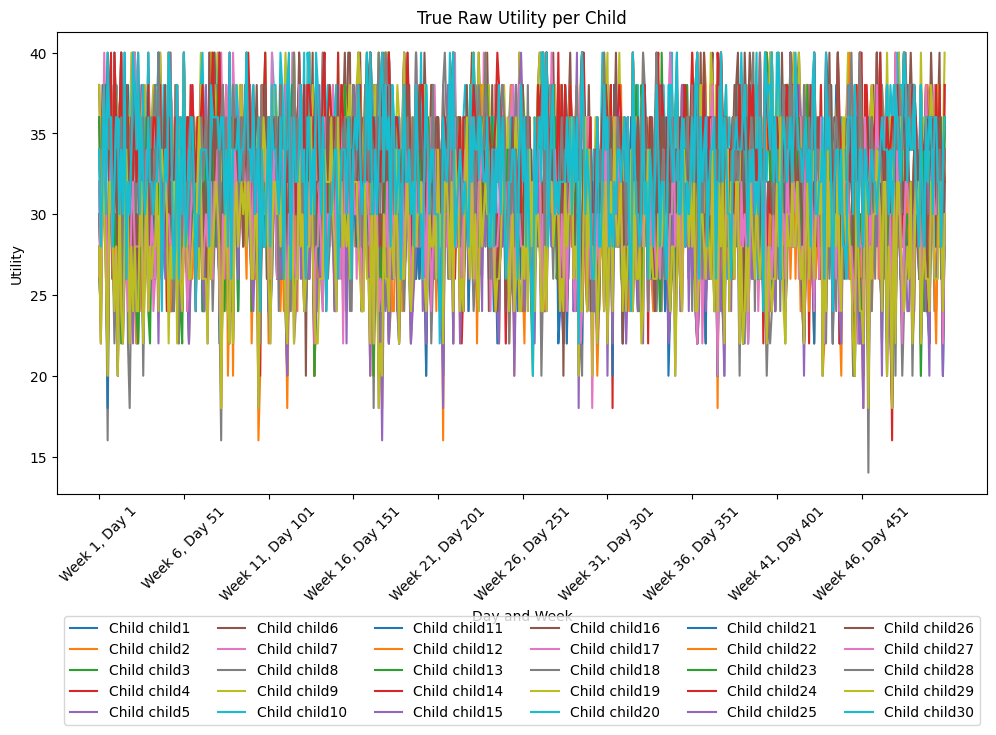

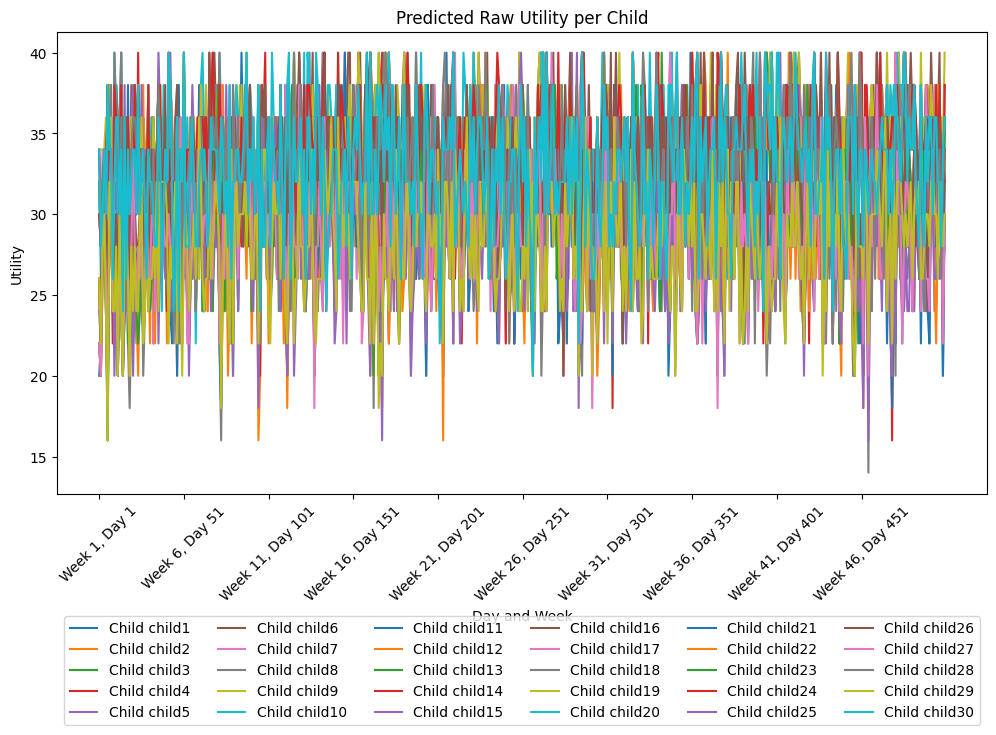

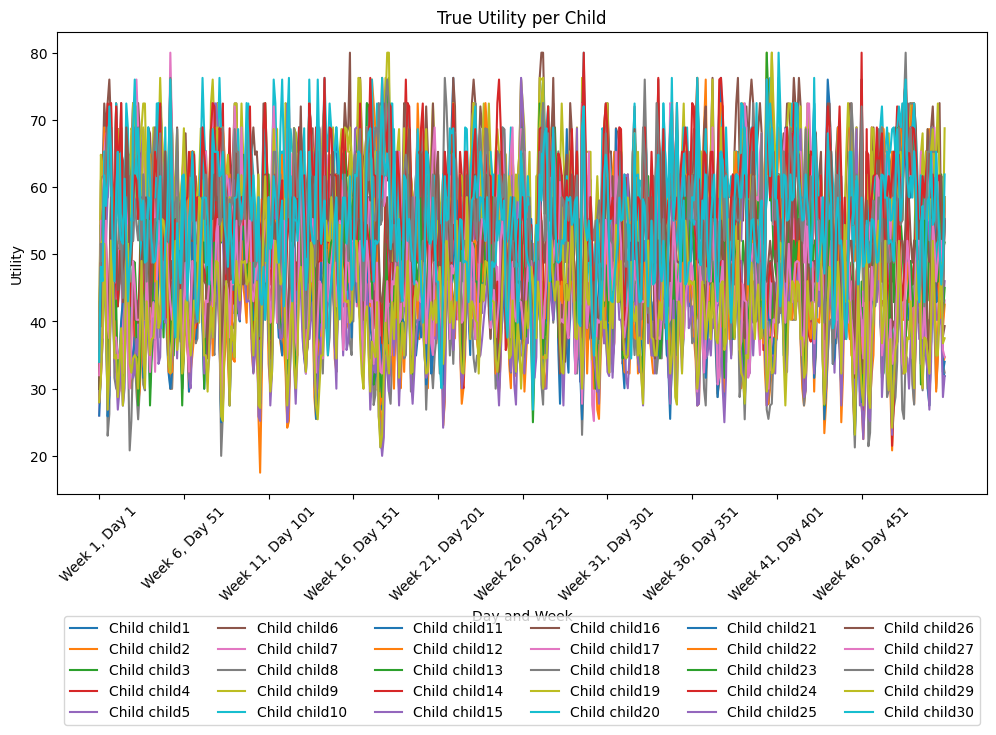

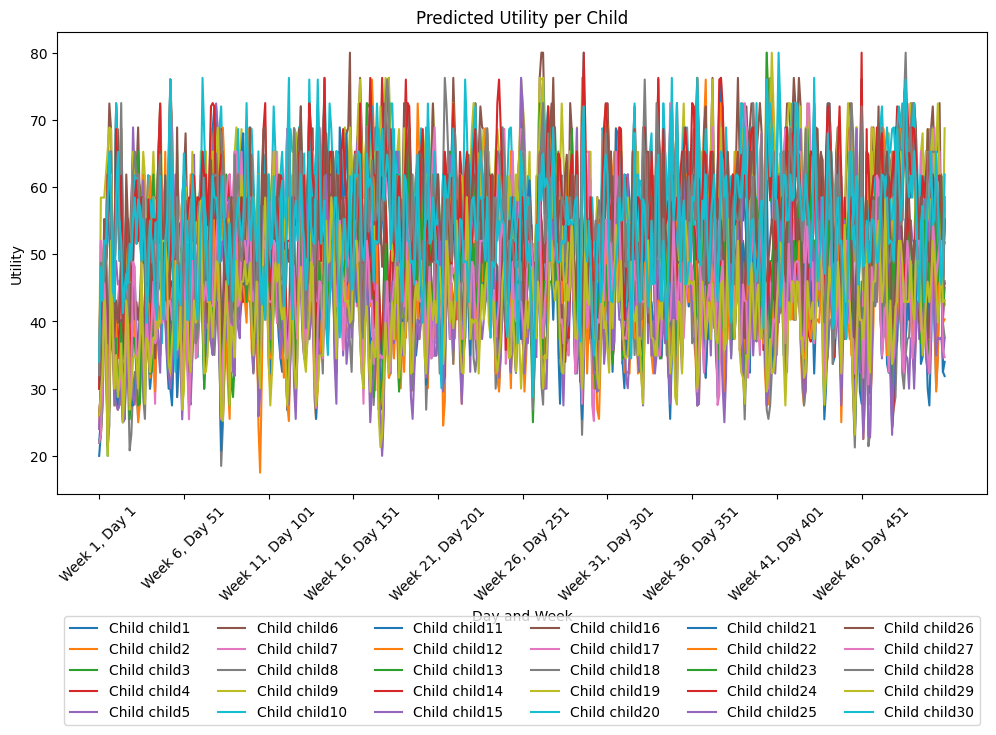

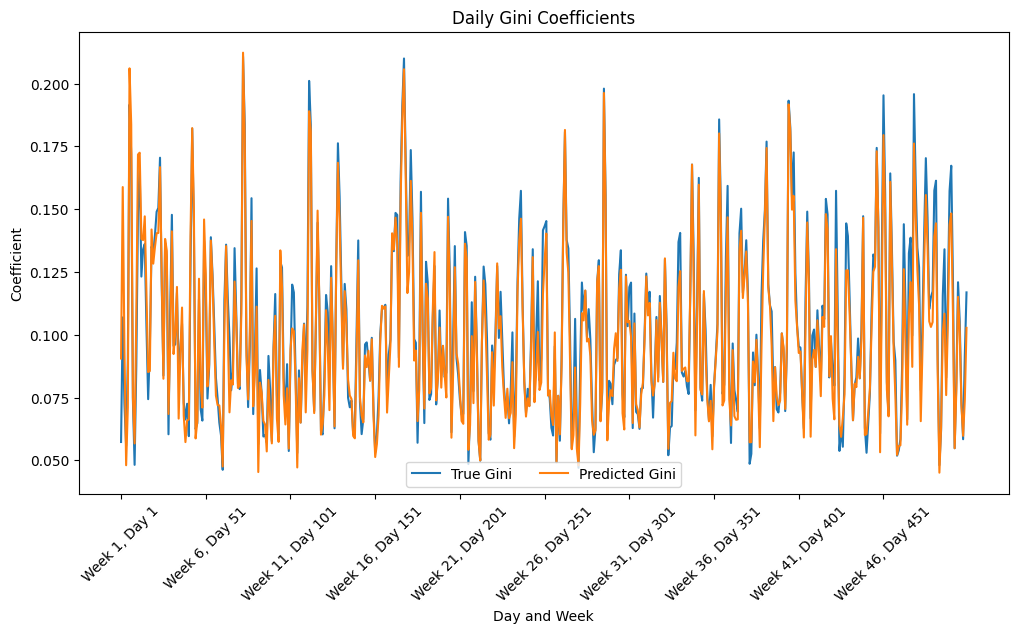

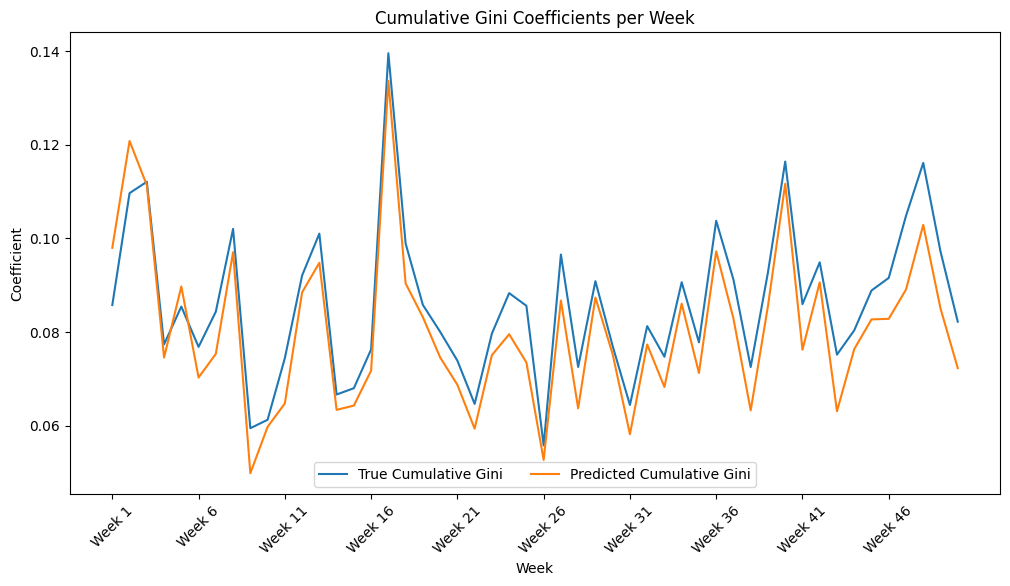

In [ ]:
import json
import matplotlib.pyplot as plt

def plot_utilities_from_json(file_path: str, save_path: str = None) -> None:
    with open(file_path, 'r') as file:
        data = json.load(file)

    def save_or_show_plot(filename: str = None):
        if save_path and filename:
            plt.savefig(f"{save_path}/{filename}")
        else:
            plt.show()
        plt.close()

    weeks = len(data)

    # Utility types and their sum keys
    utilities = ["true_raw_utility", "predicted_raw_utility", "true_utility", "predicted_utility"]
    sums = ["sum_true_raw_utility", "sum_predicted_raw_utility", "sum_true_utility", "sum_predicted_utility"]

    # Plot each type of utility for all weeks and days
    for utility in utilities:
        plt.figure(figsize=(12, 6))
        children_data = {}
        for week_data in data:
            week = week_data["week"]
            for day, day_data in week_data[utility].items():
                for child, value in day_data.items():
                    if child not in children_data:
                        children_data[child] = []
                    children_data[child].append((f'Week {week}, Day {day}', value))

        for child, values in children_data.items():
            x, y = zip(*values)
            plt.plot(x, y, label=f'Child {child}')
        
        plt.title(f'{utility.replace("_", " ").title()} per Child')
        plt.xlabel('Day and Week')
        plt.ylabel('Utility')
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=6)
        plt.xticks(rotation=45)
        plt.xticks(range(0, len(x), max(1, len(x)//10)), rotation=45)  # Reduce number of x-ticks
        save_or_show_plot(f'{utility}_per_child.png')

    # Plot daily Gini coefficients for all weeks
    plt.figure(figsize=(12, 6))
    daily_gini_true = []
    daily_gini_pred = []
    days_labels = []
    for week_data in data:
        week = week_data["week"]
        for day, gini_data in week_data["daily_gini_coefficients"].items():
            daily_gini_true.append(gini_data["true_gini"])
            daily_gini_pred.append(gini_data["predicted_gini"])
            days_labels.append(f'Week {week}, Day {day}')
    plt.plot(days_labels, daily_gini_true, label='True Gini')
    plt.plot(days_labels, daily_gini_pred, label='Predicted Gini')
    plt.title('Daily Gini Coefficients')
    plt.xlabel('Day and Week')
    plt.ylabel('Coefficient')
    plt.legend(loc='lower center', ncol=2)
    plt.xticks(rotation=45)
    plt.xticks(range(0, len(days_labels), max(1, len(days_labels)//10)), rotation=45)  # Reduce number of x-ticks
    save_or_show_plot('daily_gini_coefficients.png')

    # Plot cumulative Gini coefficients per week
    plt.figure(figsize=(12, 6))
    cumulative_gini_true = []
    cumulative_gini_pred = []
    week_labels = []
    for week_data in data:
        week = week_data["week"]
        cumulative_gini = week_data["cumulative_gini_coefficients"][-1]  # Get the last cumulative Gini for each week
        cumulative_gini_true.append(cumulative_gini["true_cumulative_gini"])
        cumulative_gini_pred.append(cumulative_gini["predicted_cumulative_gini"])
        week_labels.append(f'Week {week}')
    plt.plot(week_labels, cumulative_gini_true, label='True Cumulative Gini')
    plt.plot(week_labels, cumulative_gini_pred, label='Predicted Cumulative Gini')
    plt.title('Cumulative Gini Coefficients per Week')
    plt.xlabel('Week')
    plt.ylabel('Coefficient')
    plt.legend(loc='lower center', ncol=2)
    plt.xticks(rotation=45)
    plt.xticks(range(0, len(week_labels), max(1, len(week_labels)//10)), rotation=45)  # Reduce number of x-ticks
    save_or_show_plot('cumulative_gini_coefficients.png')

# Example usage
plot_utilities_from_json("/home/laurie2905/Masters Thesis/Masters_RL/menu_utilities.json")




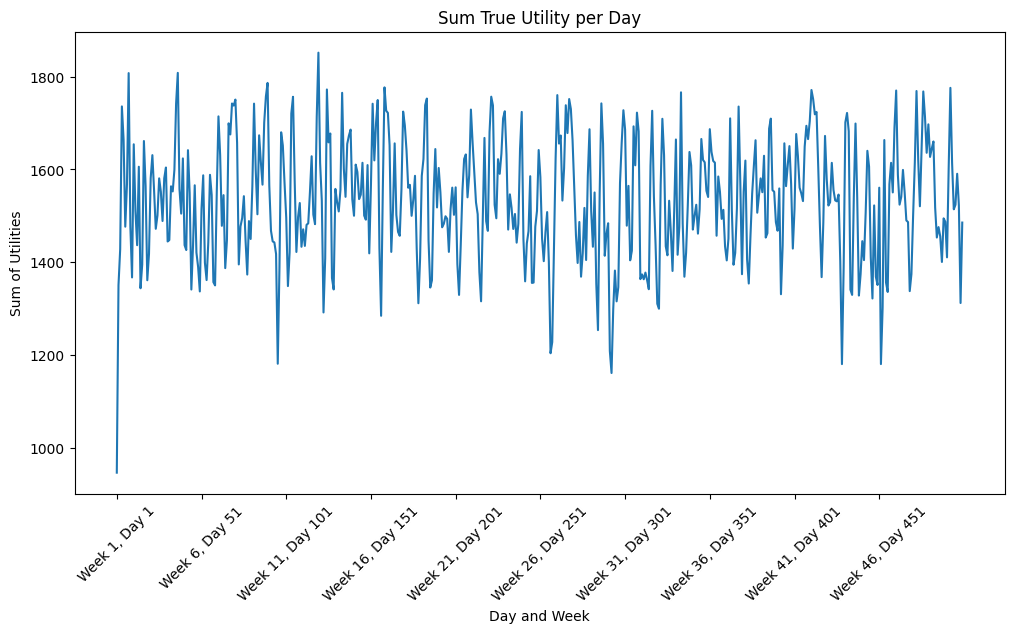

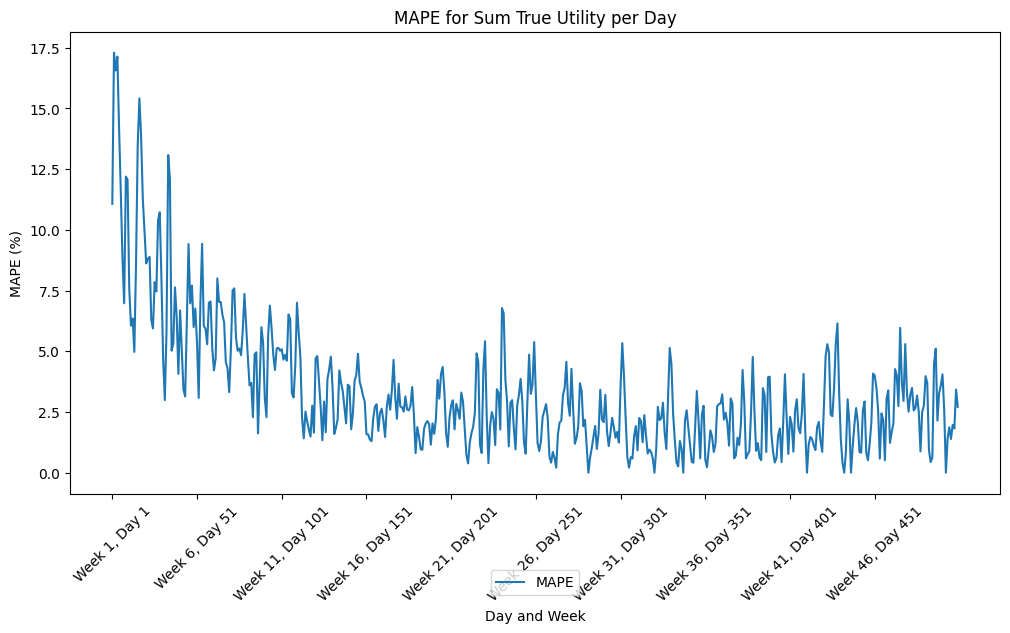

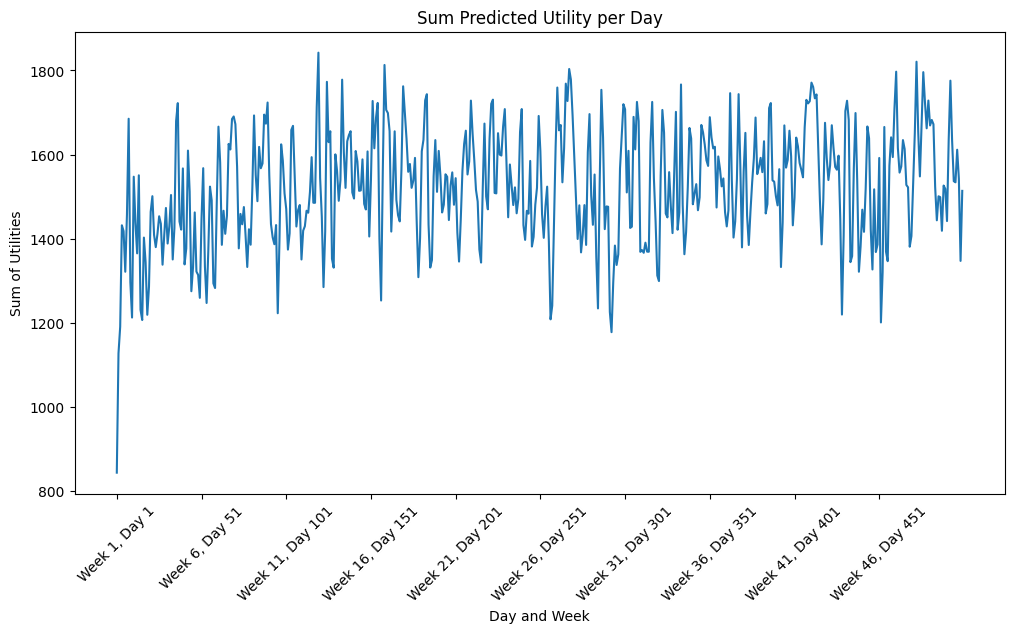

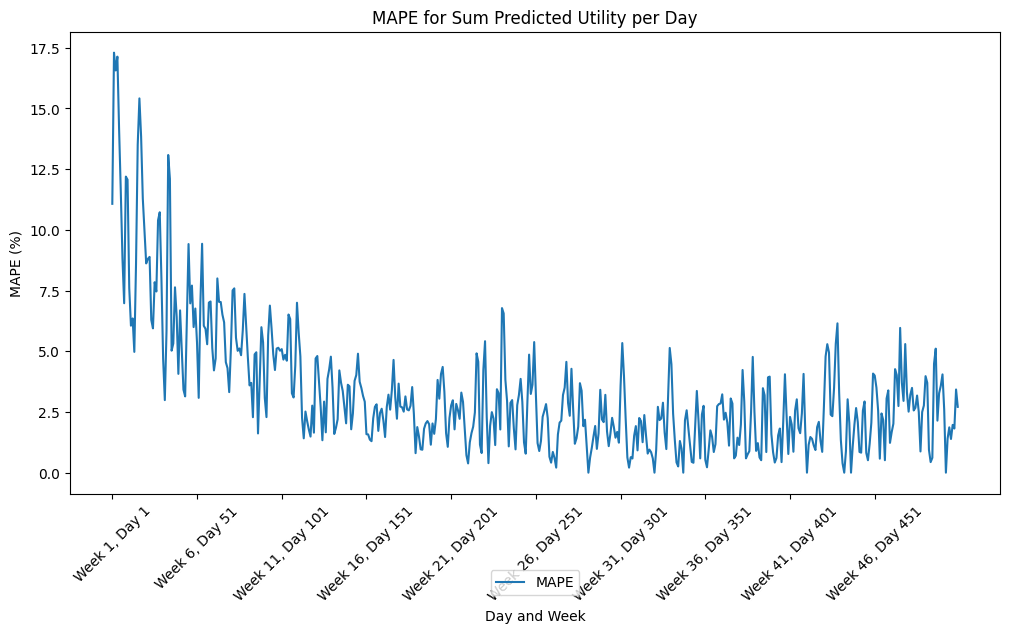

In [ ]:
import json
import matplotlib.pyplot as plt
from typing import Dict, List

def calculate_mape(true_values: Dict[str, float], predicted_values: Dict[str, float]) -> float:
    """
    Calculate the Mean Absolute Percentage Error (MAPE) between true and predicted values.
    """
    mape = 100 * sum(abs(true_values[child] - predicted_values[child]) / true_values[child] for child in true_values) / len(true_values)
    return mape

def plot_mape(days_labels: List[str], true_utility: List[Dict[str, float]], predicted_utility: List[Dict[str, float]], title: str, save_path: str = None) -> None:
    """
    Plot the Mean Absolute Percentage Error (MAPE) between true and predicted utility.
    """
    mape_values = []

    for true_values, predicted_values in zip(true_utility, predicted_utility):
        mape = calculate_mape(true_values, predicted_values)
        mape_values.append(mape)

    plt.figure(figsize=(12, 6))
    plt.plot(days_labels, mape_values, label='MAPE')
    plt.title(f'MAPE for {title}')
    plt.xlabel('Day and Week')
    plt.ylabel('MAPE (%)')
    plt.xticks(range(0, len(days_labels), max(1, len(days_labels) // 10)), rotation=45)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    save_or_show_plot(f'MAPE_{title}.png', save_path)

def save_or_show_plot(filename: str = None, save_path: str = None):
    """
    Save the plot to the specified path if given, otherwise show the plot.
    """
    if save_path and filename:
        plt.savefig(f"{save_path}/{filename}")
    else:
        plt.show()
    plt.close()

def plot_utilities_and_mape(file_path: str, save_path: str = None) -> None:
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Utility types and their sum keys
    sums = ["sum_true_utility", "sum_predicted_utility"]

    # Plot sums of utilities for all weeks
    for sum_utility in sums:
        plt.figure(figsize=(12, 6))
        all_days = []
        all_values = []
        true_utility_per_day = []
        predicted_utility_per_day = []
        for week_data in data:
            week = week_data["week"]
            days = sorted(week_data[sum_utility].keys(), key=int)
            values = [week_data[sum_utility][day] for day in days]
            true_utility = [week_data["true_utility"][day] for day in days]
            predicted_utility = [week_data["predicted_utility"][day] for day in days]
            all_days.extend([f'Week {week}, Day {day}' for day in days])
            all_values.extend(values)
            true_utility_per_day.extend(true_utility)
            predicted_utility_per_day.extend(predicted_utility)
        plt.plot(all_days, all_values)
        title = f'{sum_utility.replace("_", " ").title()} per Day'
        plt.title(title)
        plt.xlabel('Day and Week')
        plt.ylabel('Sum of Utilities')
        plt.xticks(range(0, len(all_days), max(1, len(all_days) // 10)), rotation=45)
        save_or_show_plot(f'{sum_utility}_per_day.png', save_path)

        # Calculate and plot accuracy (MAPE) between true and predicted utility cumulative sums
        plot_mape(all_days, true_utility_per_day, predicted_utility_per_day, title, save_path)

# Example usage
plot_utilities_and_mape("/home/laurie2905/Masters Thesis/Masters_RL/menu_utilities.json")


In [ ]:
def classify_ingredient_sentiment(sentence, ingredients, classifier):
    results = {}
    tokens = sentence.split()
    
    for ingredient in ingredients:
        # Check if the ingredient is in the sentence
        if ingredient in tokens:
            # Find the position of the ingredient in the sentence
            ingredient_index = tokens.index(ingredient)
            
            # Extract a window of words around the ingredient
            window = tokens[max(0, ingredient_index-3):min(len(tokens), ingredient_index+4)]
            
            # Reconstruct the context sentence for the ingredient
            context = ' '.join(window)
            
            # Classify the sentiment of this context
            sentiment = classifier.classify(context)
            results[ingredient] = sentiment
        else:
            results[ingredient] = 'not mentioned'
    
    return results

from textblob.classifiers import NaiveBayesClassifier

# Example data to update the classifier
new_data = [
    ("I love apples and oranges.", "pos"),
    ("I hate broccoli.", "neg"),
    ("Carrots are okay.", "neutral"),
    ("Spinach is not good.", "neg"),
]

# Update the classifier with new data
cl = NaiveBayesClassifier(new_data)

# Example test sentence with multiple ingredients
sentence = "I love apples but hate spinach."

# List of ingredients you're interested in
ingredients = ["apples", "spinach", "broccoli"]

# Classify sentiment for each ingredient
ingredient_sentiments = classify_ingredient_sentiment(sentence, ingredients, cl)

# Print the results
for ingredient, sentiment in ingredient_sentiments.items():
    print(f"Sentiment towards '{ingredient}': {sentiment}")
